In [2]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re 
import time 
from collections import Counter
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import calendar
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier


In [12]:
orig_labelled_df = pd.read_csv('labelled_df.csv')

columns_to_keep = ['betTimestamp', 'odds_units', 'stake_gbp', 'count_legs',
       'hours_to_event', 'edge', 'encrypted_user_no', 'insert_date',
       'riskexposureprematch', 'betTimestamp_diff', 'odds_units_diff',
       'stake_gbp_diff', 'count_legs_diff', 'hours_to_event_diff',
       'riskexposureprematch_diff', 'month', 'day',
       'day_of_week', 'hour',
       'total_bets_until_now', 'avg_riskexposureprematch_until_now',
       'avg_odds_units_until_now', 'avg_count_legs_until_now',
       'avg_stake_gbp_until_now', 'total_stake_gbp_until_now',
       'std_stake_gbp_until_now', 'bets_in_last_1_week(s)',
       'bets_in_last_2_week(s)', 'bets_in_last_3_week(s)',
       'bets_in_last_4_week(s)', 'high_net_worth']

labelled_df = orig_labelled_df[columns_to_keep].copy()

In [19]:
labelled_df.describe()

odds_units     stake_gbp    count_legs  hours_to_event          edge  \
count  2.476065e+06  2.476065e+06  2.476065e+06    2.476065e+06  2.476065e+06   
mean   2.260041e+04  1.747606e+01  4.038424e+00    2.292397e+01 -3.370692e-01   
std    3.050422e+05  1.266181e+02  3.112727e+00    2.006758e+02  1.868070e+00   
min    1.010000e+00  0.000000e+00  1.000000e+00    2.777778e-04 -7.898551e+01   
25%    3.400000e+00  2.200000e-01  1.000000e+00    1.369444e+00 -2.614051e-01   
50%    2.024000e+01  2.000000e+00  3.000000e+00    4.118333e+00  0.000000e+00   
75%    2.739800e+02  8.840000e+00  5.000000e+00    1.102944e+01  0.000000e+00   
max    1.471655e+07  3.740754e+04  4.000000e+01    2.428713e+04  7.196721e+01   

       riskexposureprematch  betTimestamp_diff  odds_units_diff  \
count          2.476065e+06       2.476065e+06     2.476065e+06   
mean           3.446783e+00      -3.687837e+04    -2.591041e+01   
std            6.551681e+00       1.922000e+05     2.253980e+05   
min            1.000000e-02      -6.508992e+06    -1.471016e+07   
25%            1.000000e+00      -8.101000e+03    -1.195000e+01   
50%            1.990000e+00      -5.800000e+01     0.000000e+00   
75%            3.000000e+00       0.000000e+00     1.146000e+01   
max            5.000000e+01       0.000000e+00     1.470600e+07   

       stake_gbp_diff  count_legs_diff  ...  avg_odds_units_until_now  \
count    2.476065e+06     2.476065e+06  ...              2.476065e+06   
mean    -6.936478e-03    -5.330232e-03  ...              1.910804e+04   
std      1.016759e+02     1.965874e+00  ...              1.797251e+05   
min     -3.630175e+04    -1.340000e+02  ...              1.020000e+00   
25%      0.000000e+00     0.000000e+00  ...              7.445422e+00   
50%      0.000000e+00     0.000000e+00  ...              6.731867e+01   
75%      2.000000e-02     0.000000e+00  ...              2.379765e+03   
max      3.173973e+04     3.500000e+01  ...              6.837268e+06   

       avg_count_legs_until_now  avg_stake_gbp_until_now  \
count              2.476065e+06             2.476065e+06   
mean               3.959713e+00             1.754630e+01   
std                2.433668e+00             9.417362e+01   
min                1.000000e+00             8.000000e-02   
25%                2.145833e+00             6.381475e-01   
50%                3.500000e+00             3.742432e+00   
75%                5.352895e+00             1.275500e+01   
max                3.435714e+01             1.317502e+04   

       total_stake_gbp_until_now  std_stake_gbp_until_now  \
count               2.476065e+06             2.476065e+06   
mean                5.325959e+03             1.979646e+01   
std                 2.171246e+04             8.611665e+01   
min                 8.000000e-02             0.000000e+00   
25%                 2.623400e+02             1.087302e+00   
50%                 9.260500e+02             4.250932e+00   
75%                 3.179090e+03             1.409290e+01   
max                 1.005141e+06             8.219532e+03   

       bets_in_last_1_week(s)  bets_in_last_2_week(s)  bets_in_last_3_week(s)  \
count            2.476065e+06            2.476065e+06            2.476065e+06   
mean             7.230273e+02            1.284100e+03            1.764314e+03   
std              1.797802e+03            3.339280e+03            4.799119e+03   
min              1.000000e+00            1.000000e+00            1.000000e+00   
25%              1.600000e+01            2.500000e+01            3.100000e+01   
50%              5.100000e+01            8.300000e+01            1.050000e+02   
75%              3.350000e+02            5.280000e+02            6.730000e+02   
max              1.471200e+04            2.276300e+04            3.137000e+04   

       bets_in_last_4_week(s)  high_net_worth  
count            2.476065e+06    2.476065e+06  
mean             2.187463e+03    1.666745e-01  
std              6.124578e+03    3.726851e-01  
min 

/var/folders/yz/86sy0w0519d250z0rfq2qx5w0000gp/T/ipykernel_13246/4157287887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = labelled_df.corr()


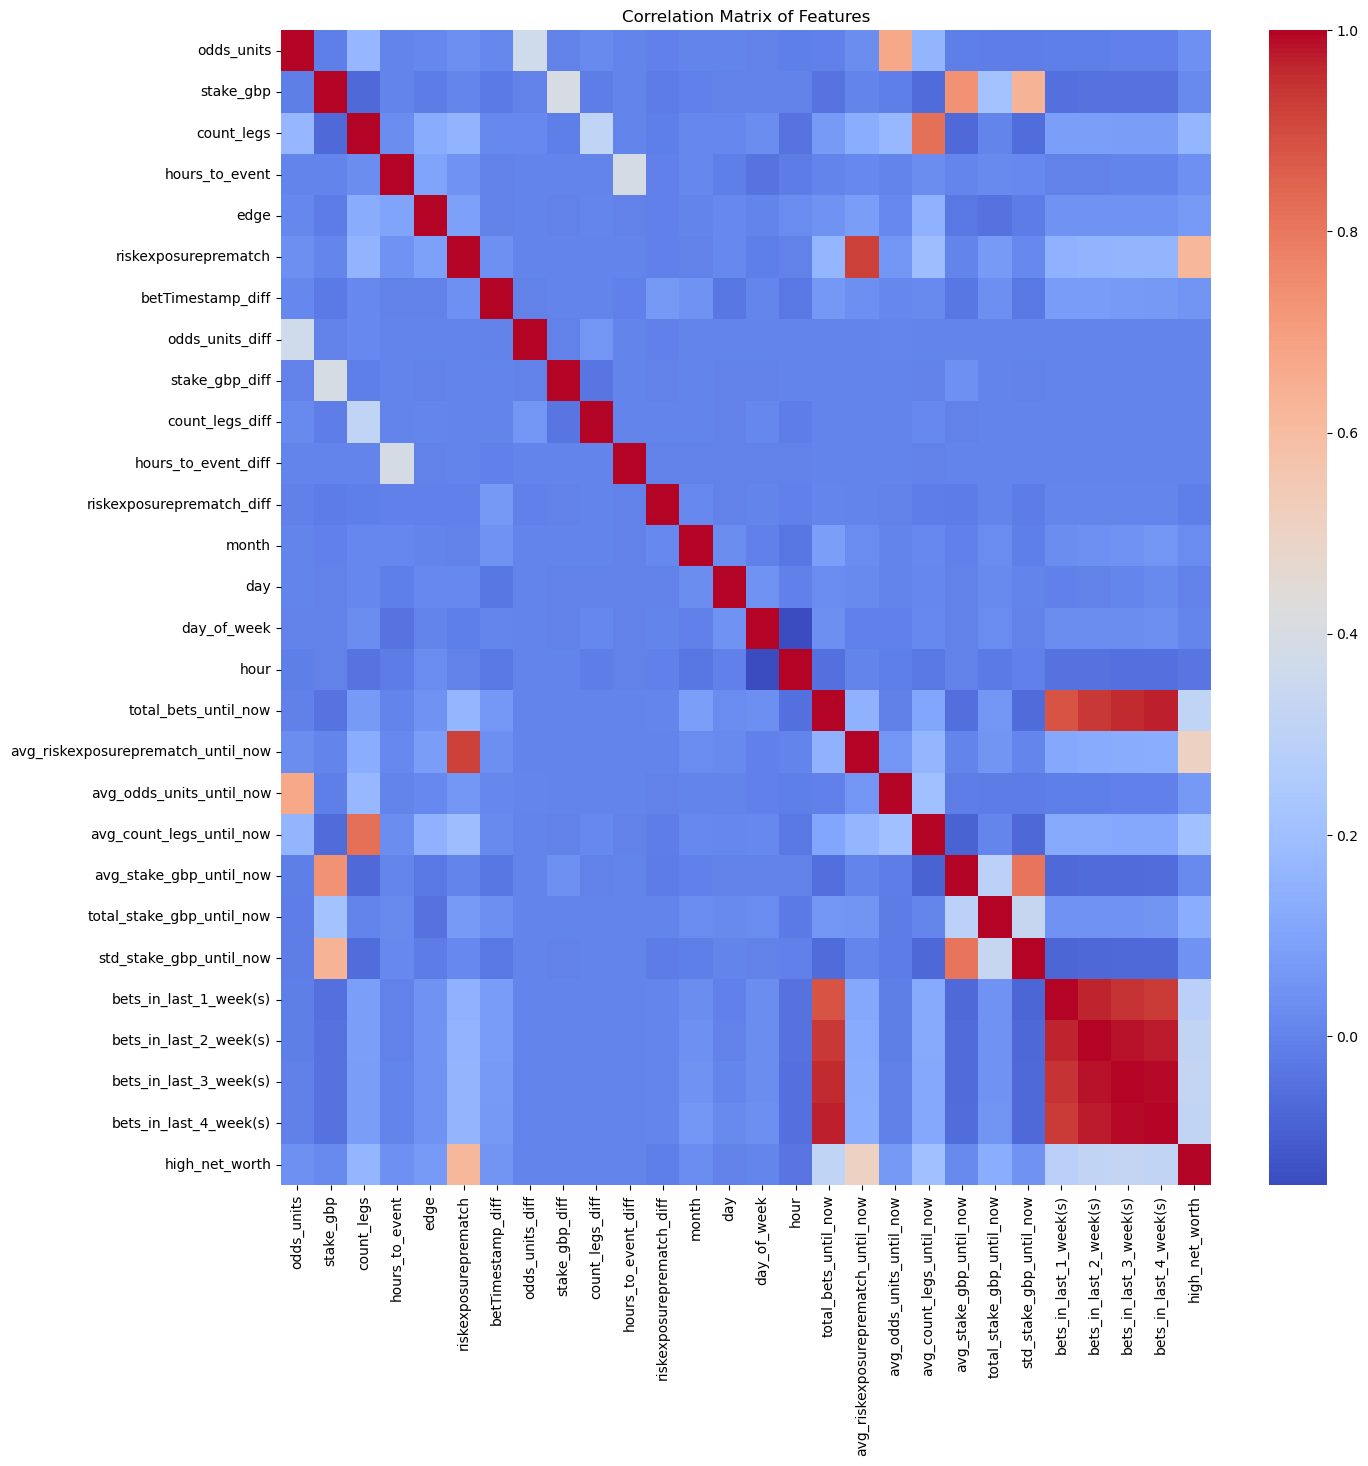

In [15]:
correlation_matrix = labelled_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

Non-numeric columns: ['betTimestamp', 'encrypted_user_no', 'insert_date']


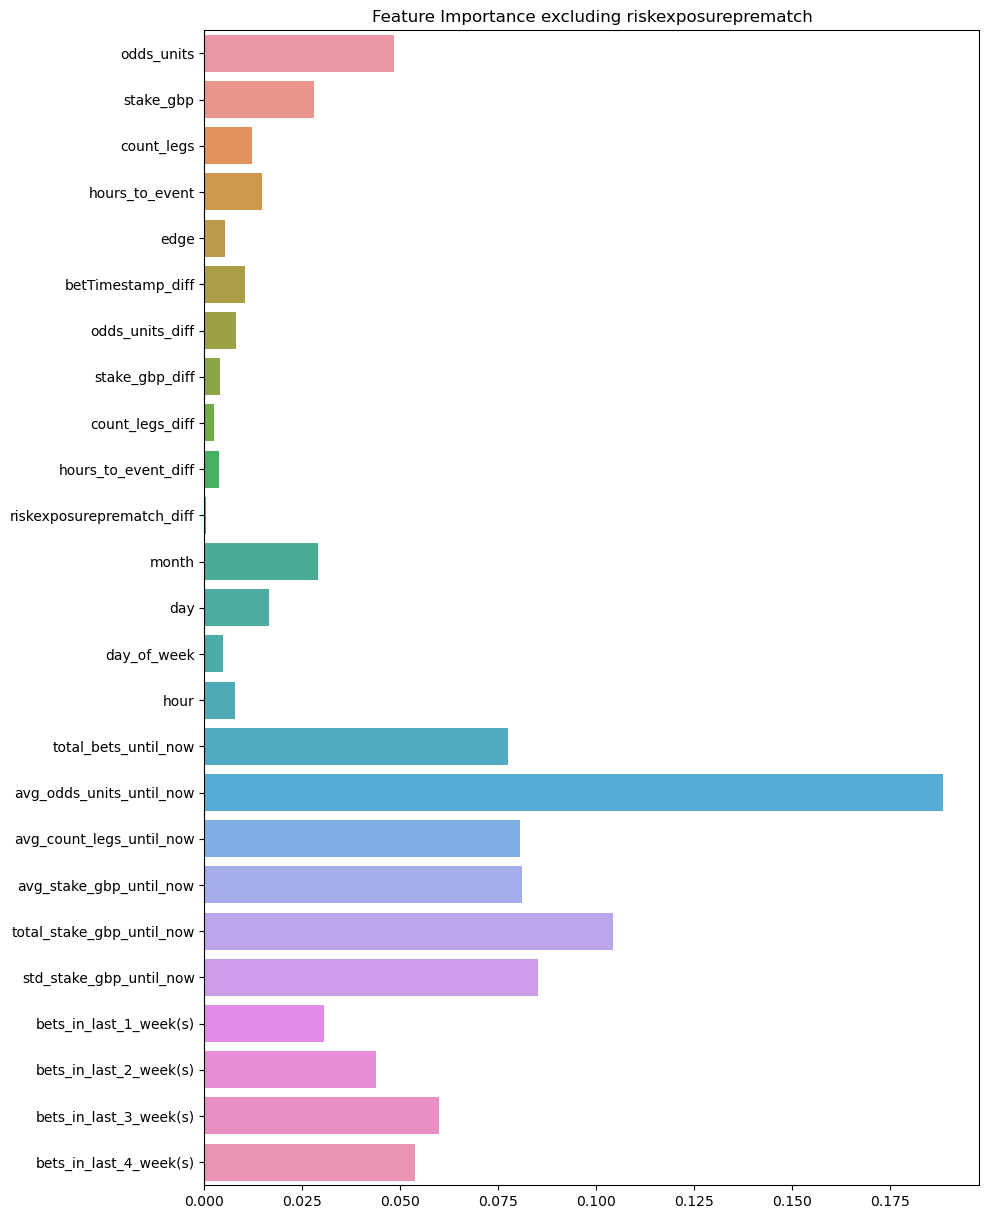

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Exclude high_net_worth, riskexposureprematch and non_numeric columns
X = labelled_df.drop(['high_net_worth', 'riskexposureprematch', 'avg_riskexposureprematch_until_now'], axis=1)

# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Non-numeric columns: {non_numeric_cols}")

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

y = labelled_df['high_net_worth']

rf = RandomForestClassifier()
rf.fit(X, y)
importance = rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 15))
sns.barplot(y=X.columns, x=importance, orient='h')
plt.title('Feature Importance excluding riskexposureprematch')
plt.show()


In [21]:
engineered_features = [
    'betTimestamp_diff', 'odds_units_diff', 'stake_gbp_diff', 
    'count_legs_diff', 'hours_to_event_diff', 'riskexposureprematch_diff',
    'total_bets_until_now', 'avg_riskexposureprematch_until_now', 
    'avg_odds_units_until_now', 'avg_count_legs_until_now', 
    'avg_stake_gbp_until_now', 'total_stake_gbp_until_now',
    'std_stake_gbp_until_now', 'bets_in_last_1_week(s)', 
    'bets_in_last_2_week(s)', 'bets_in_last_3_week(s)', 'bets_in_last_4_week(s)'
]

/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


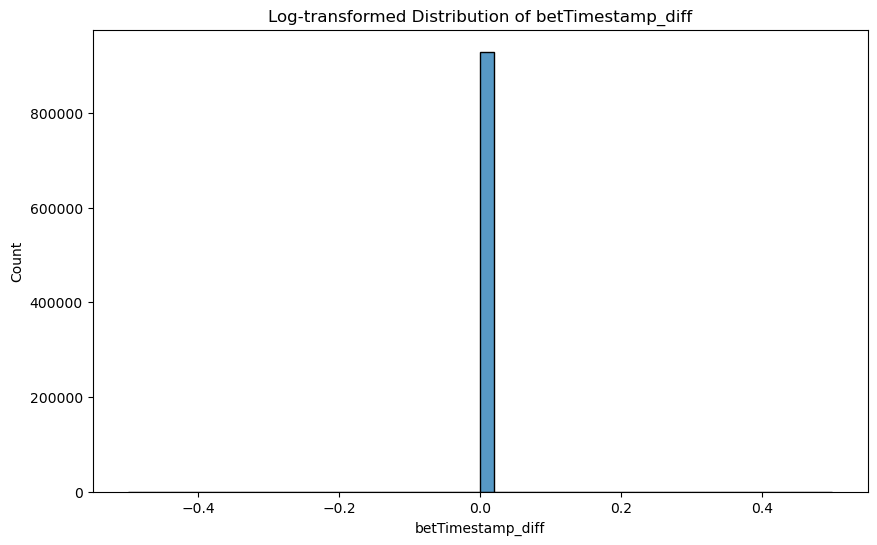

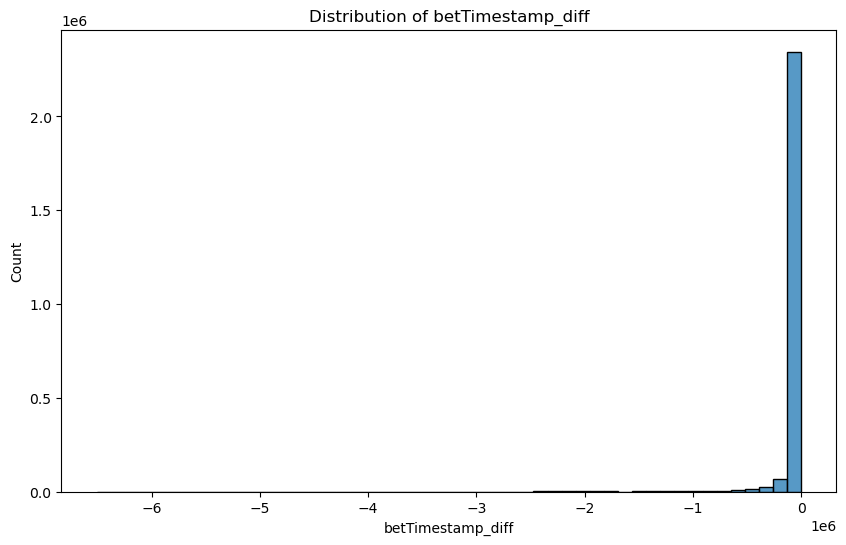

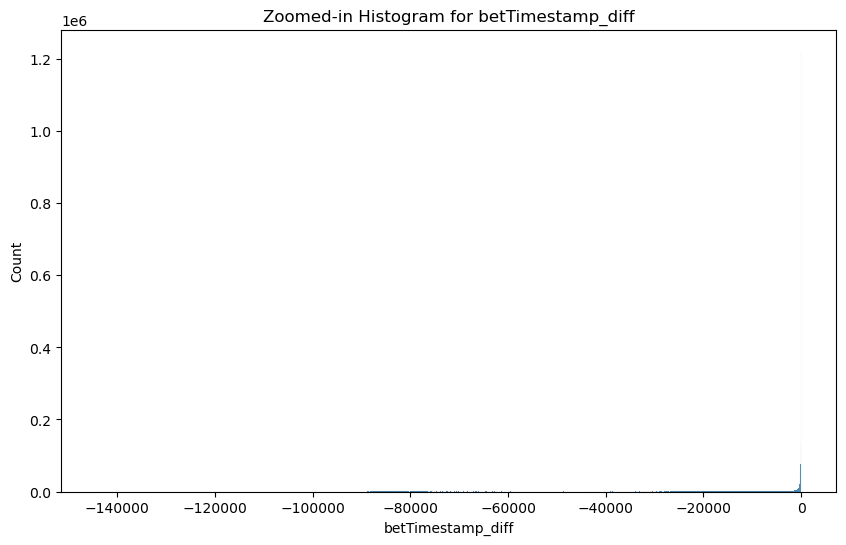

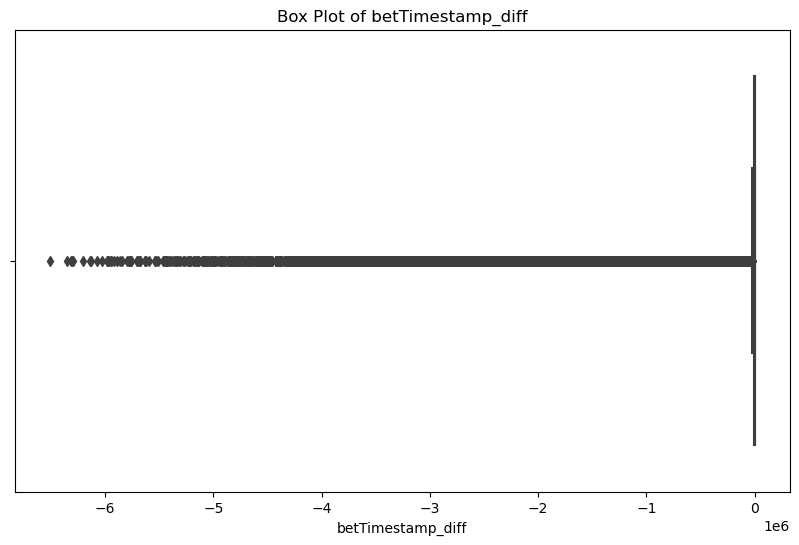

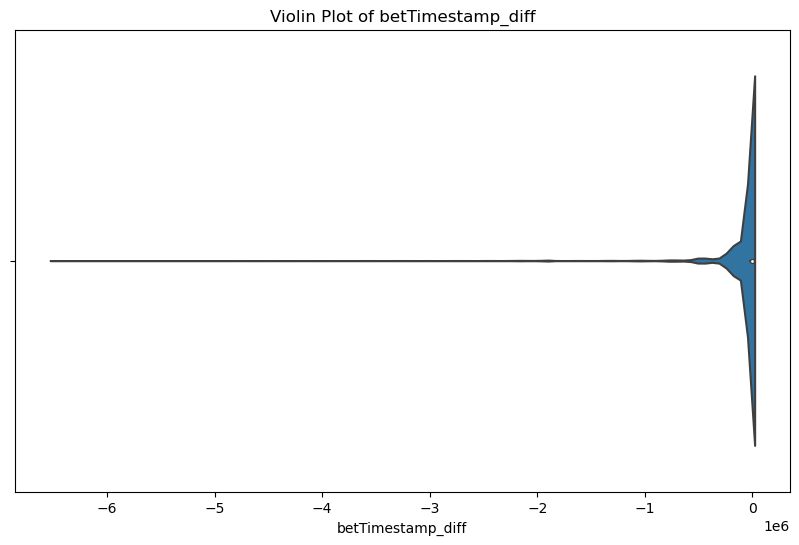

/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


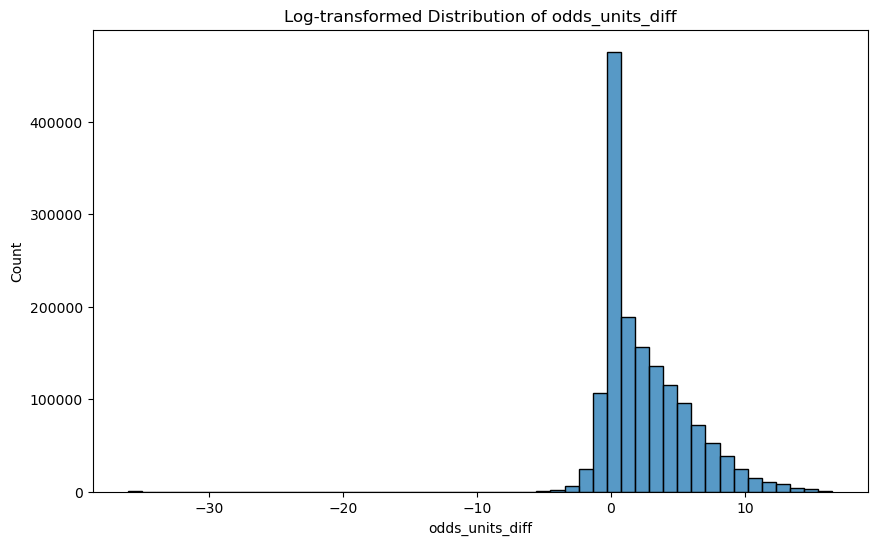

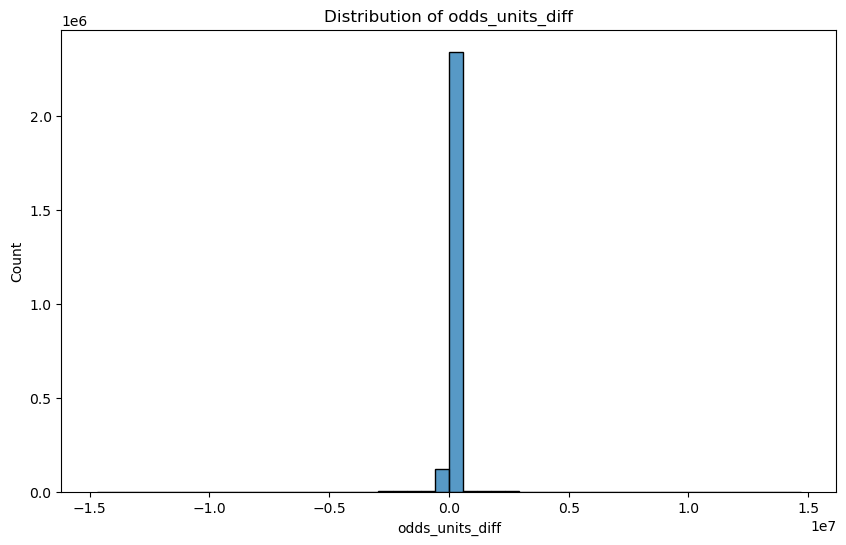

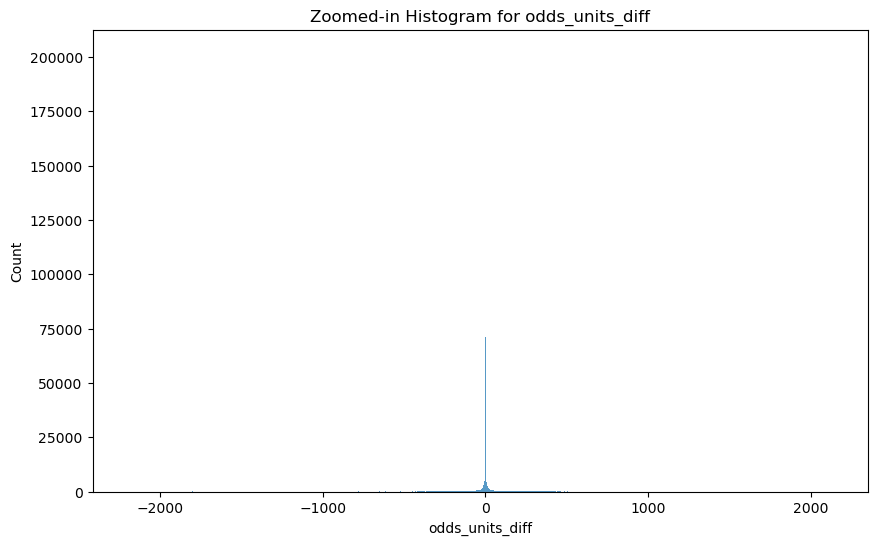

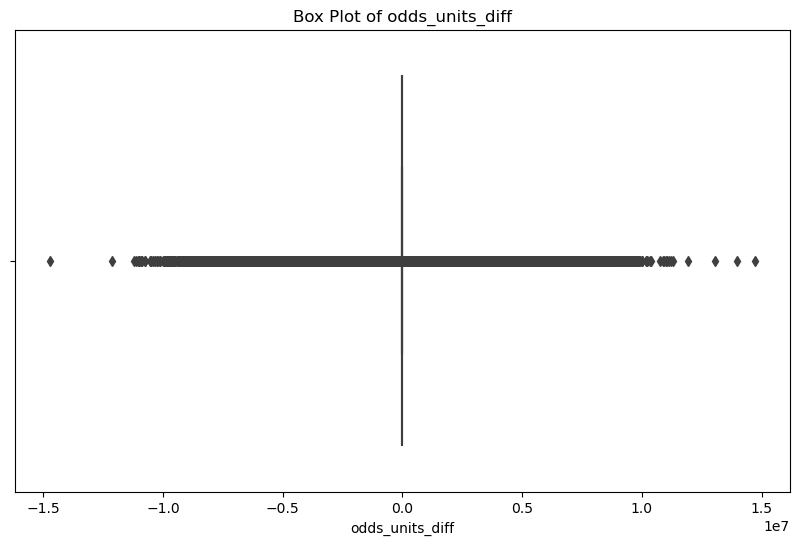

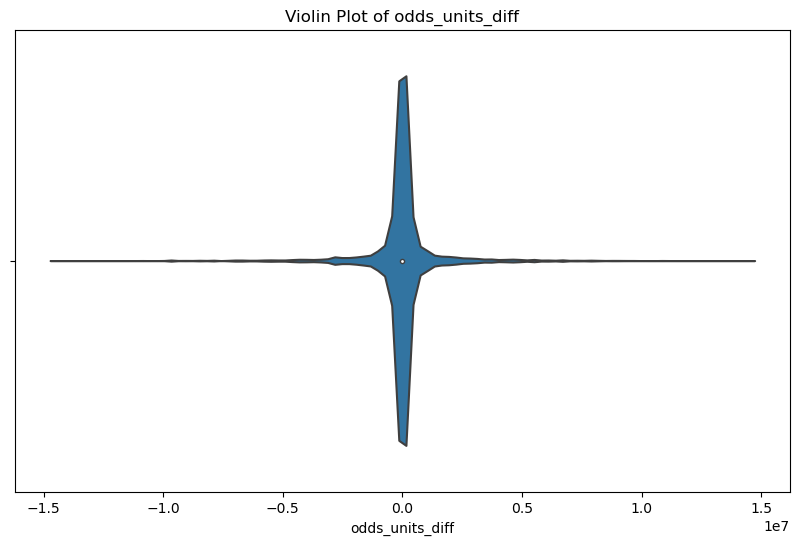

/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


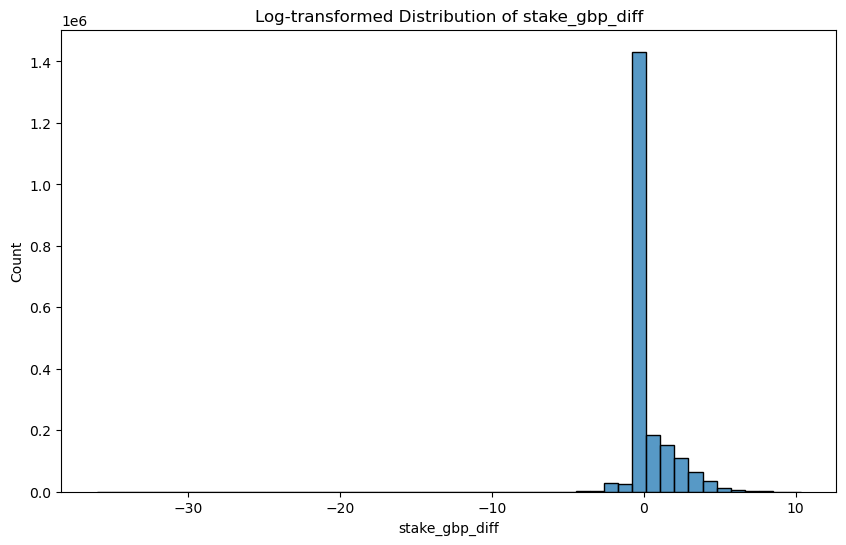

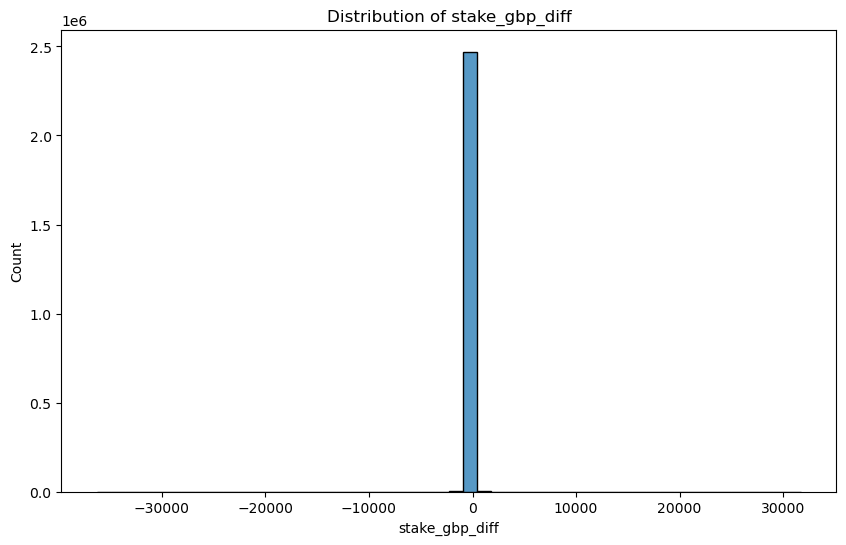

Skipping zoomed histogram for stake_gbp_diff due to zero bin width.


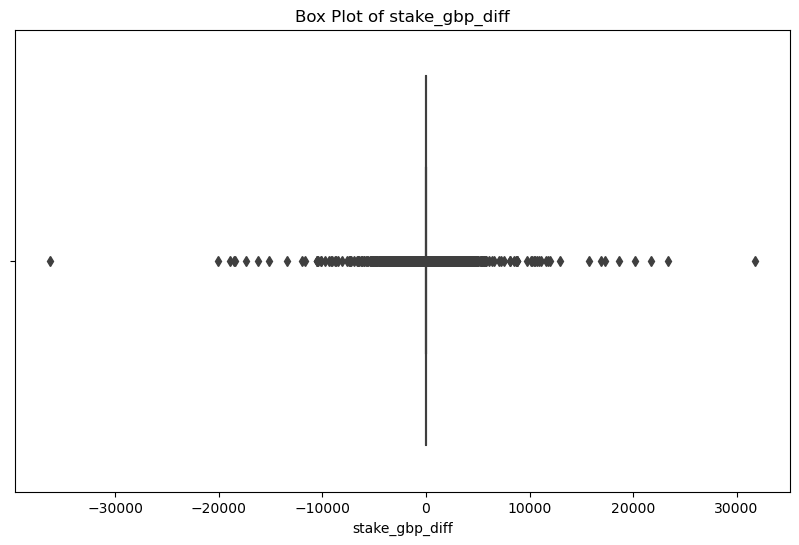

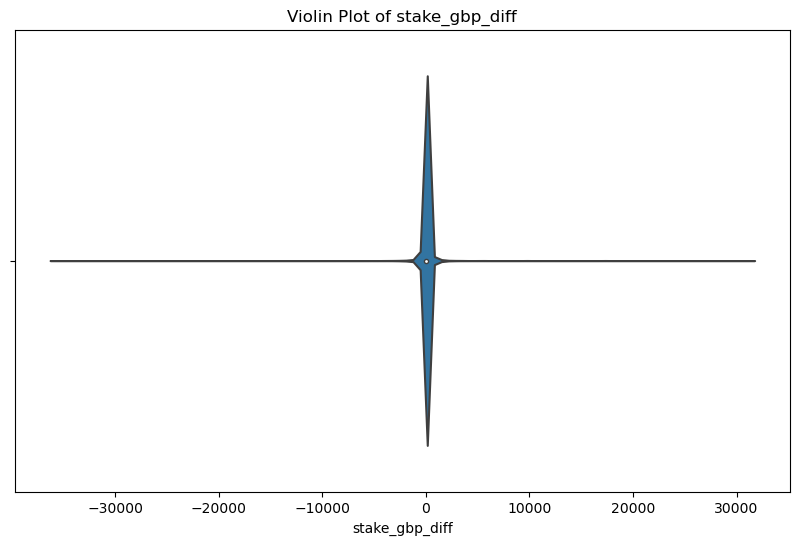

/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


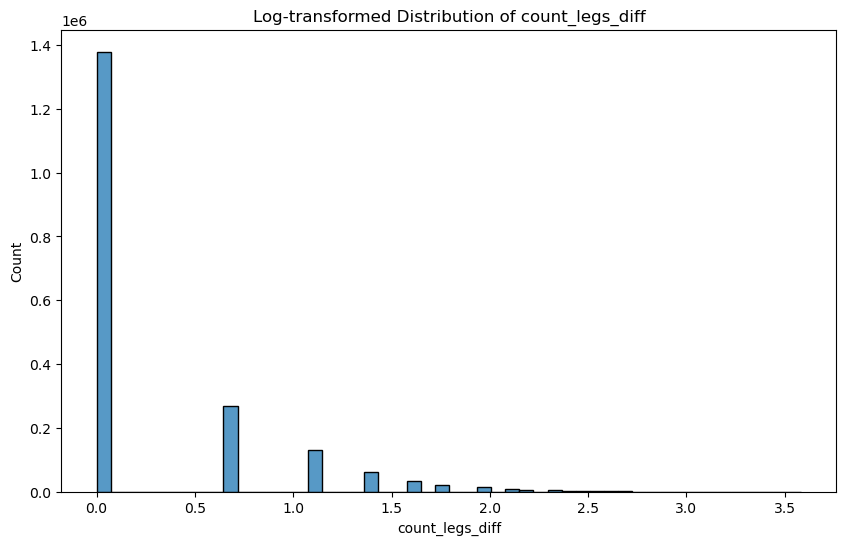

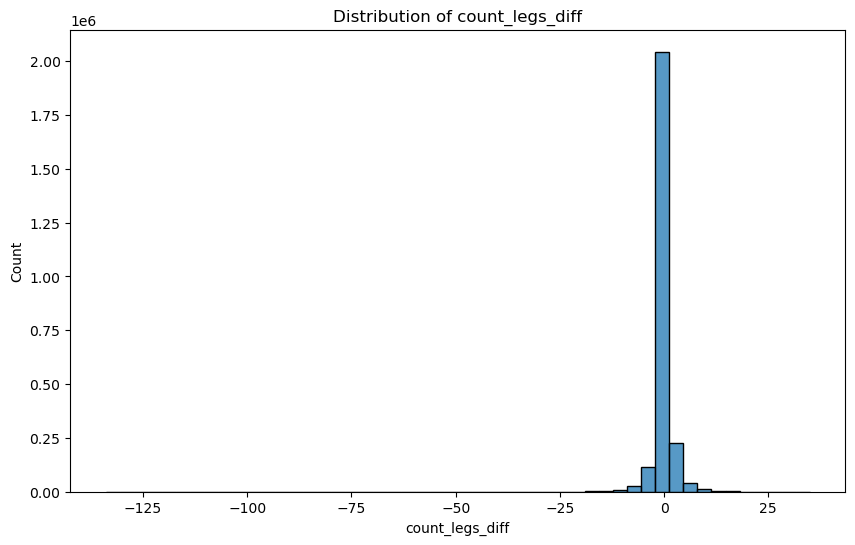

Skipping zoomed histogram for count_legs_diff due to zero bin width.


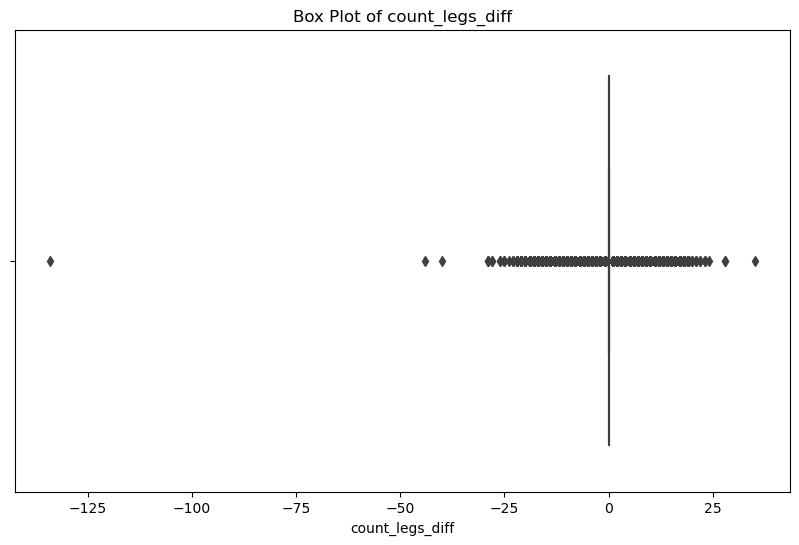

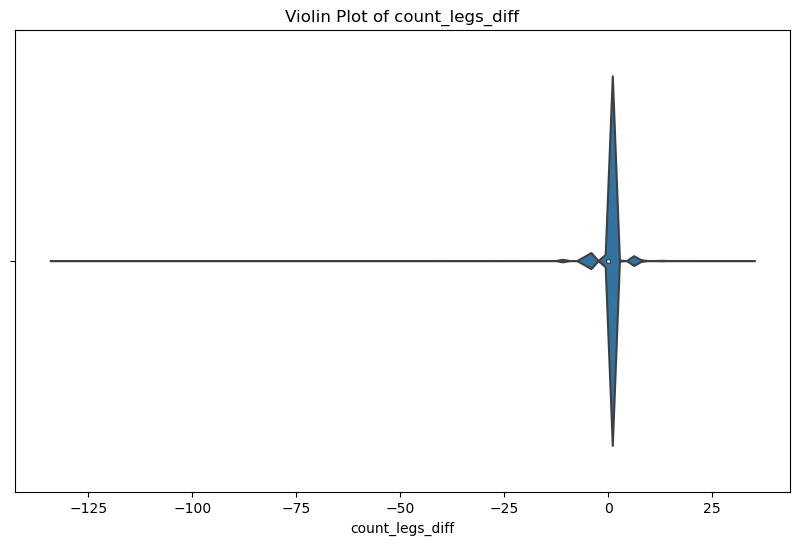

/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


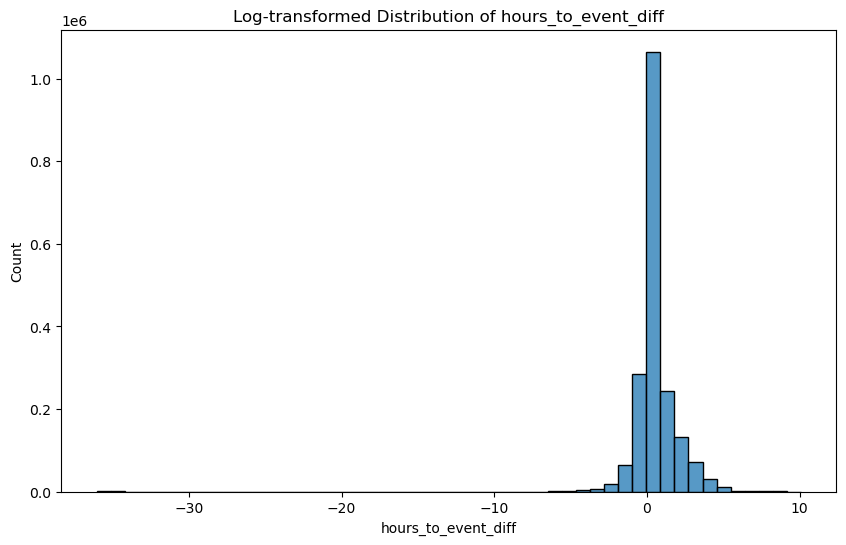

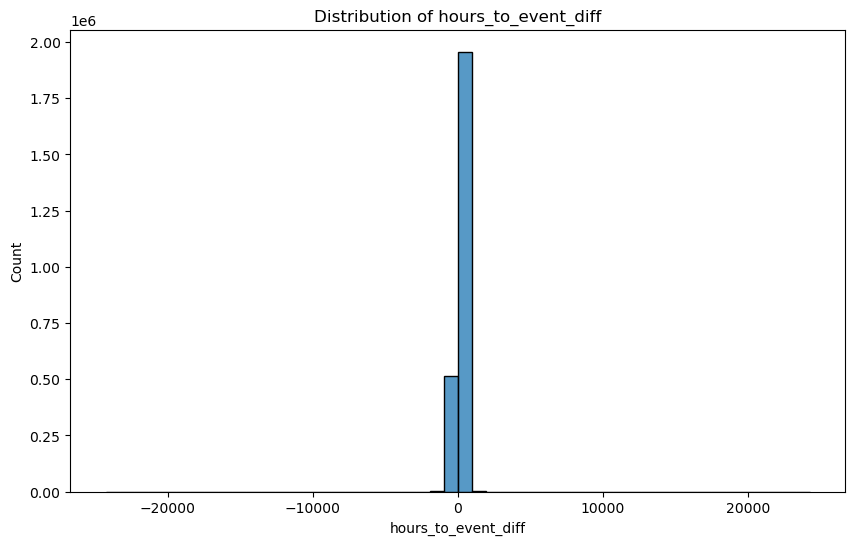

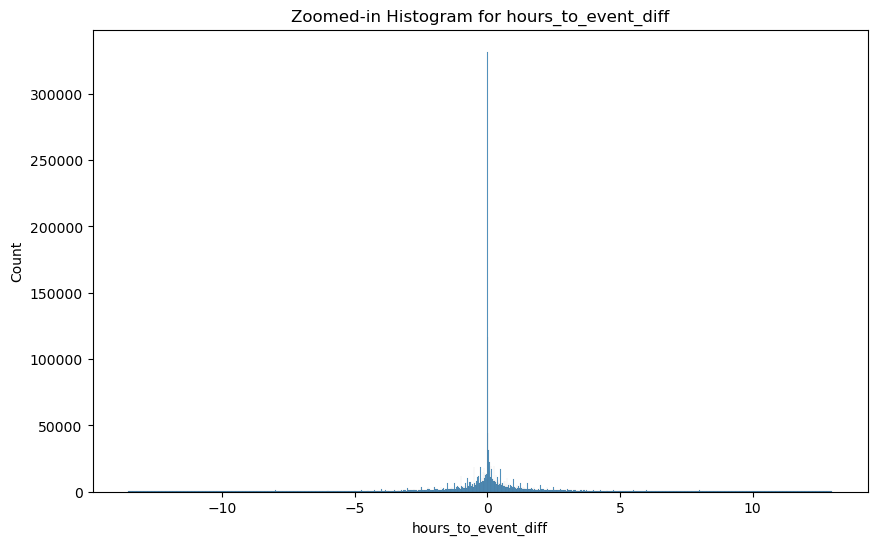

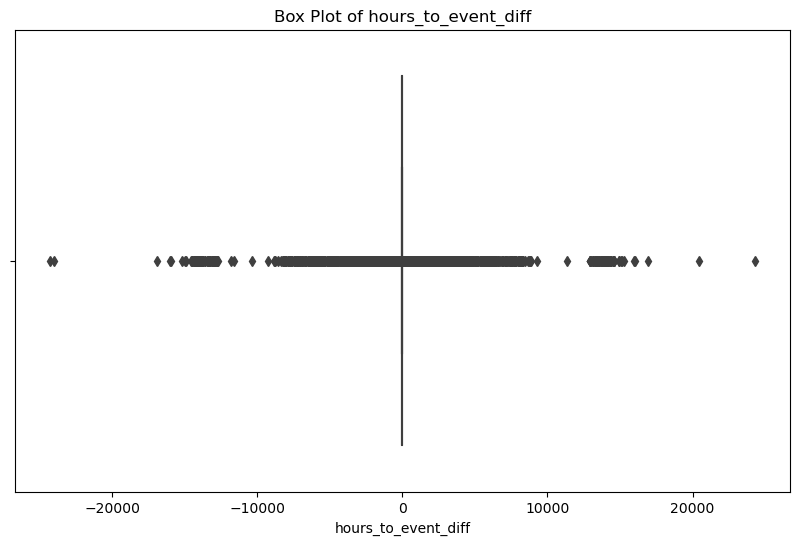

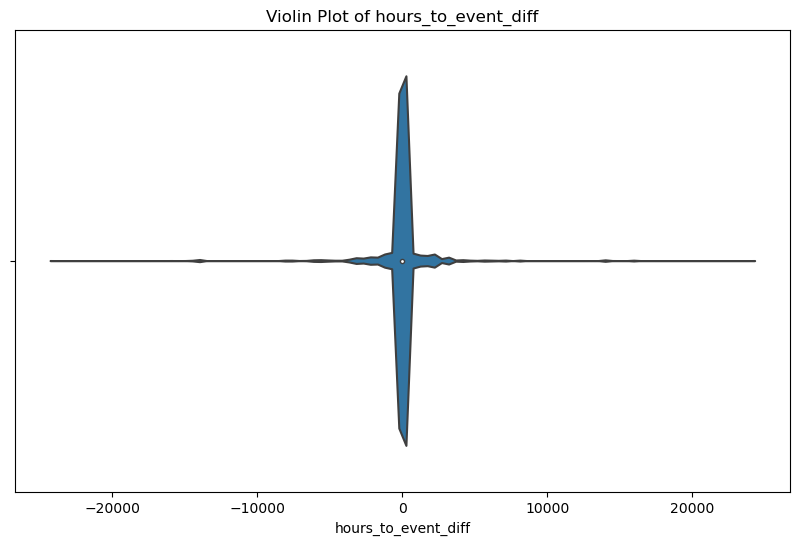

/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/DSML00/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


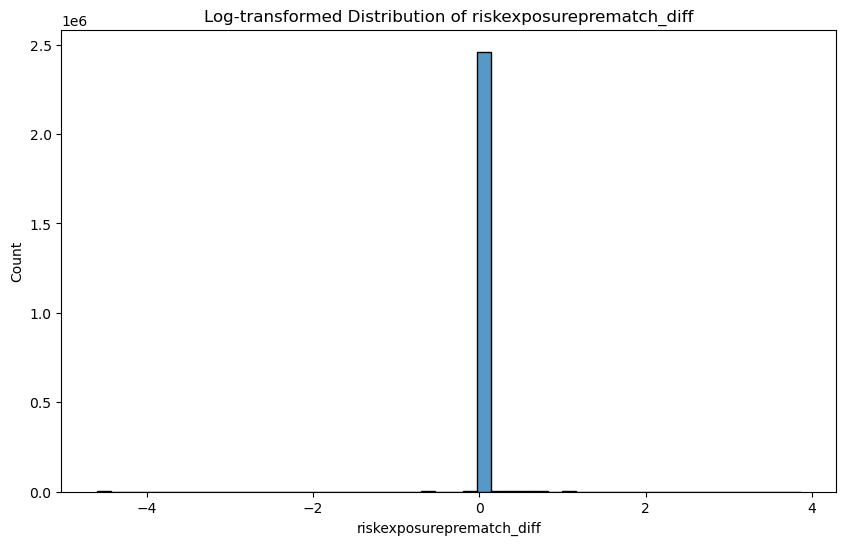

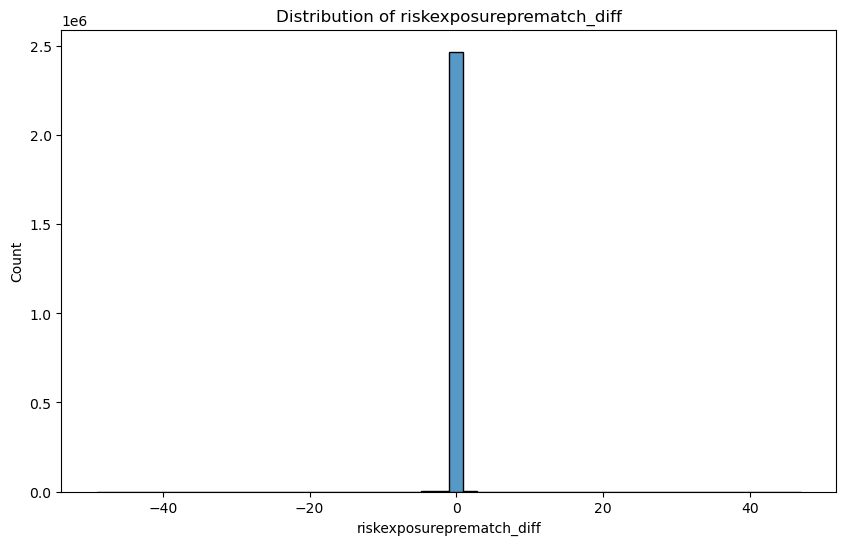

Skipping zoomed histogram for riskexposureprematch_diff due to zero bin width.


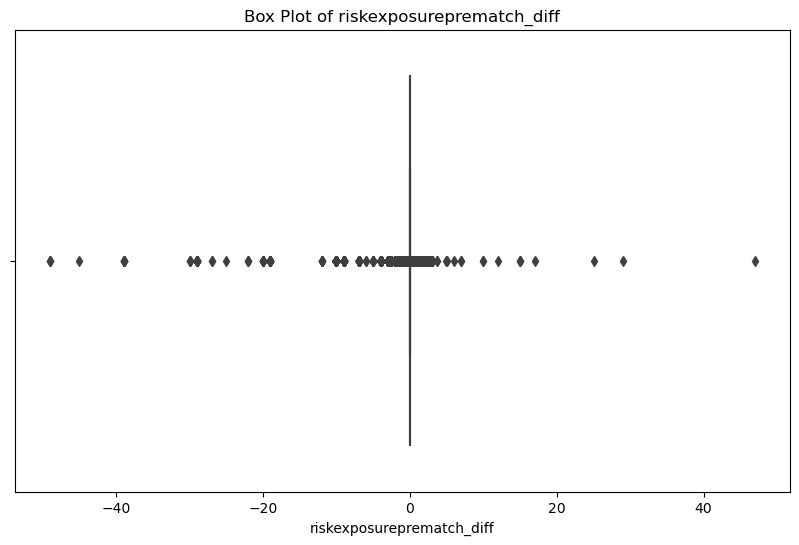

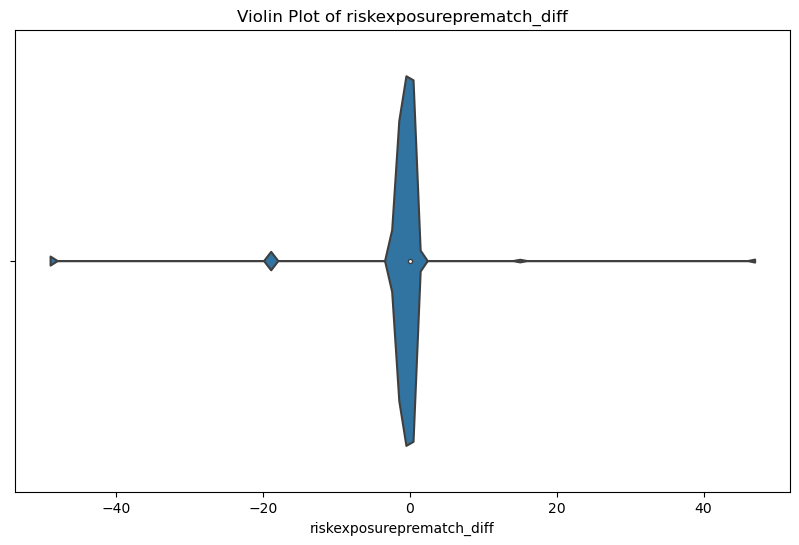

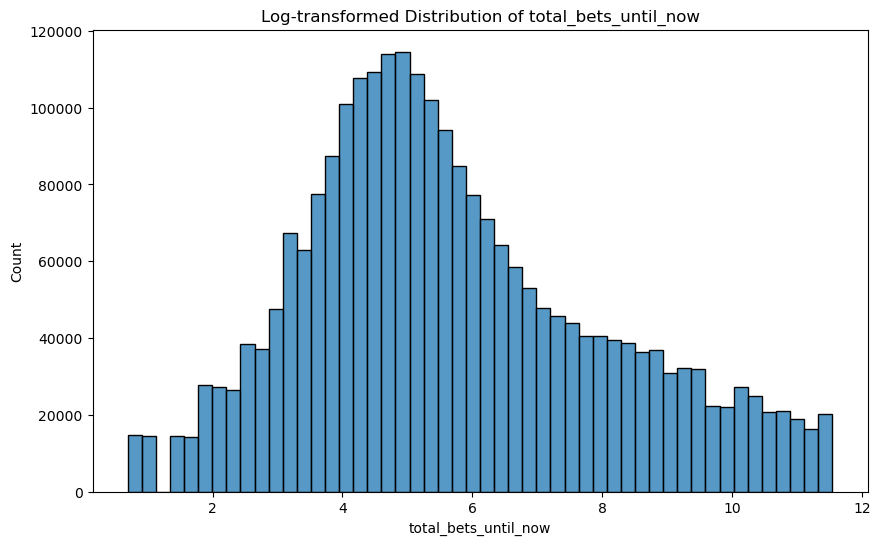

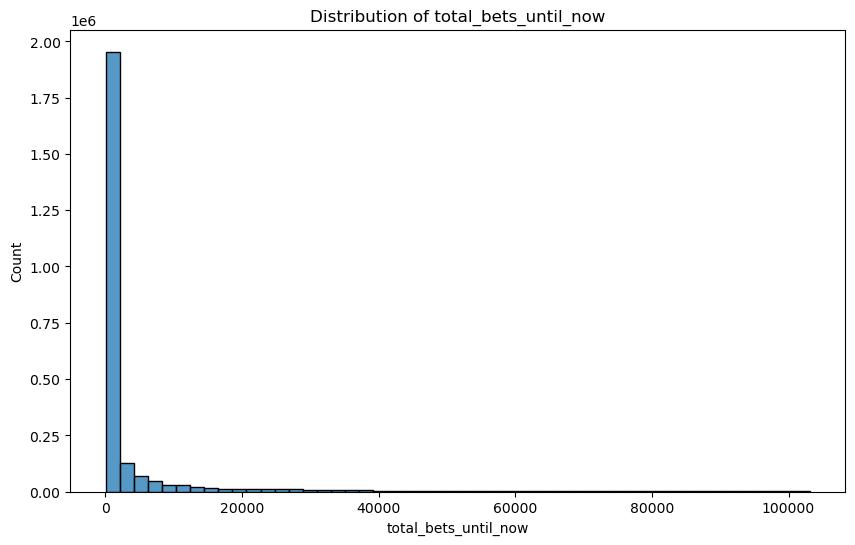

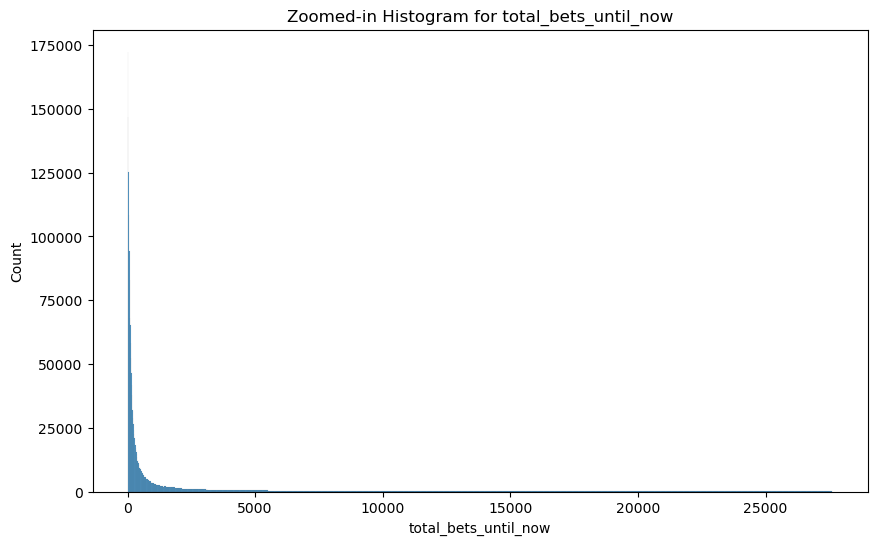

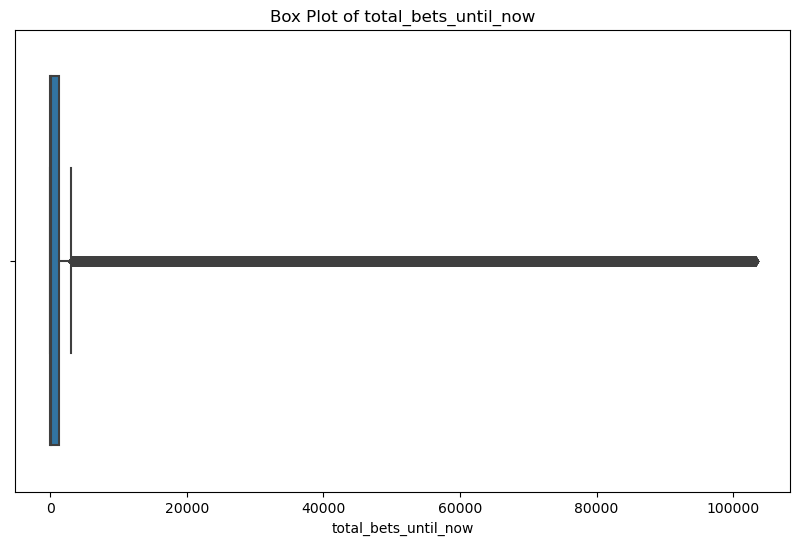

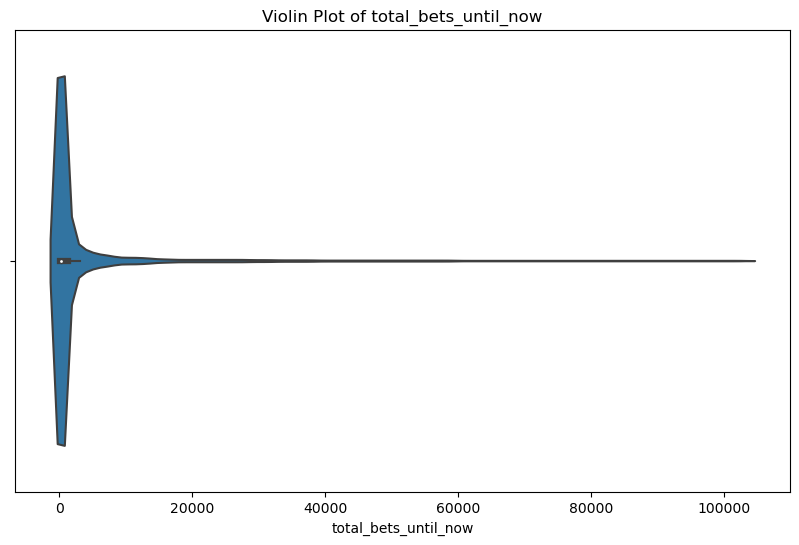

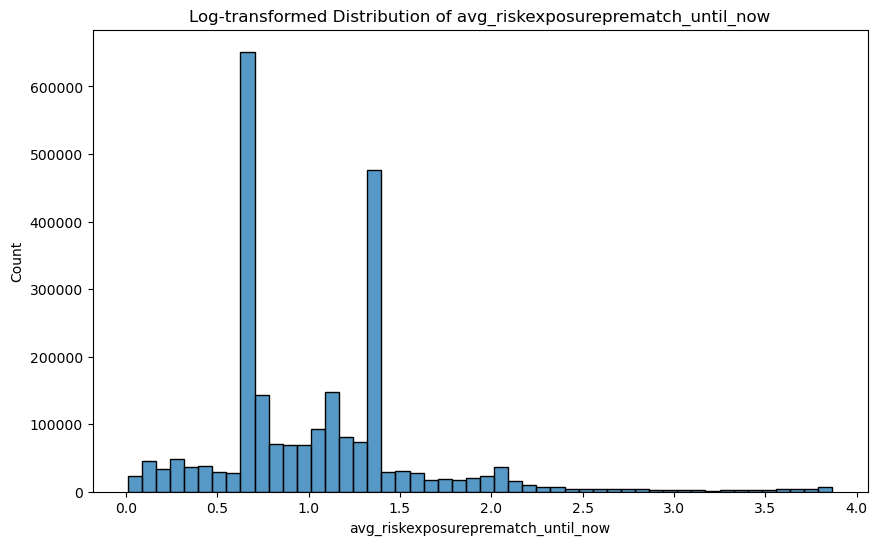

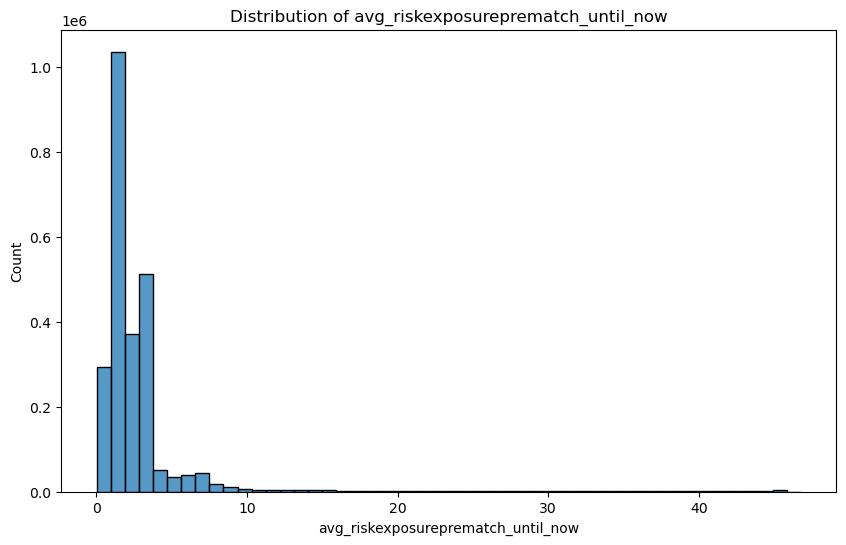

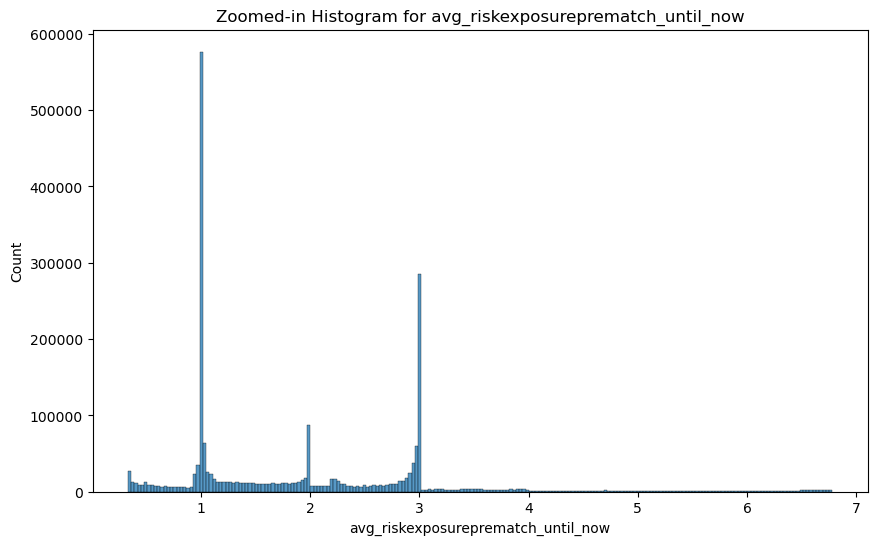

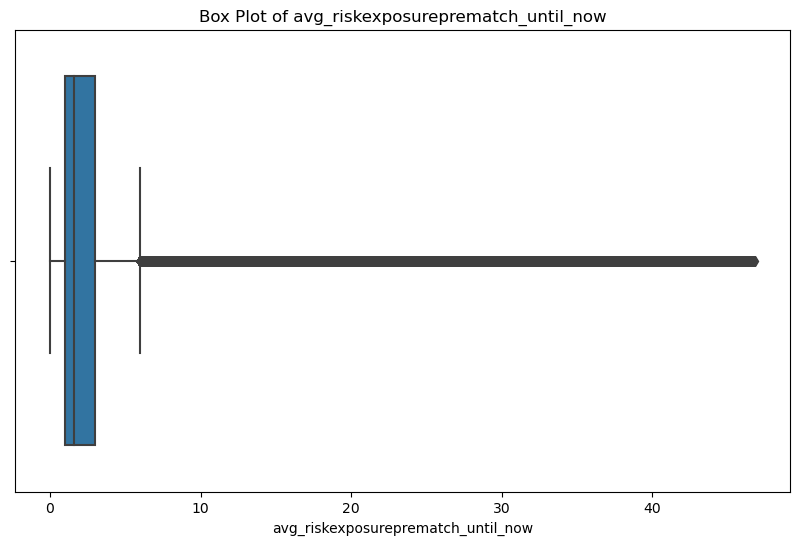

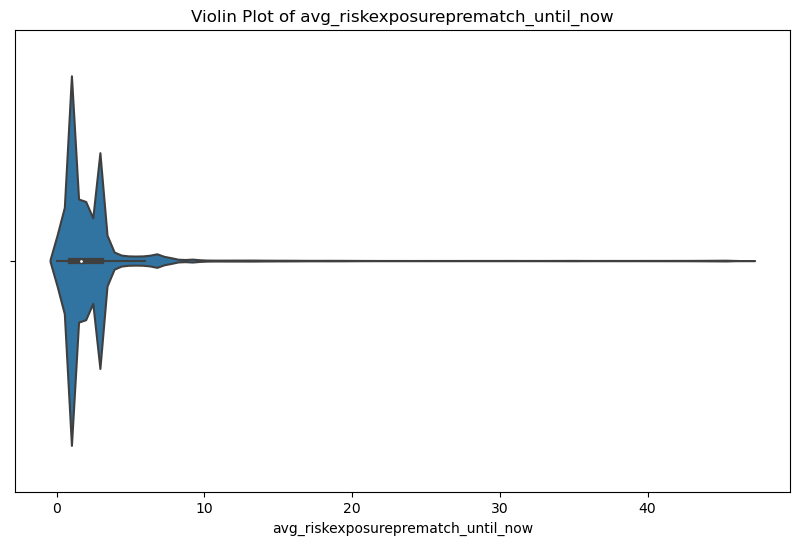

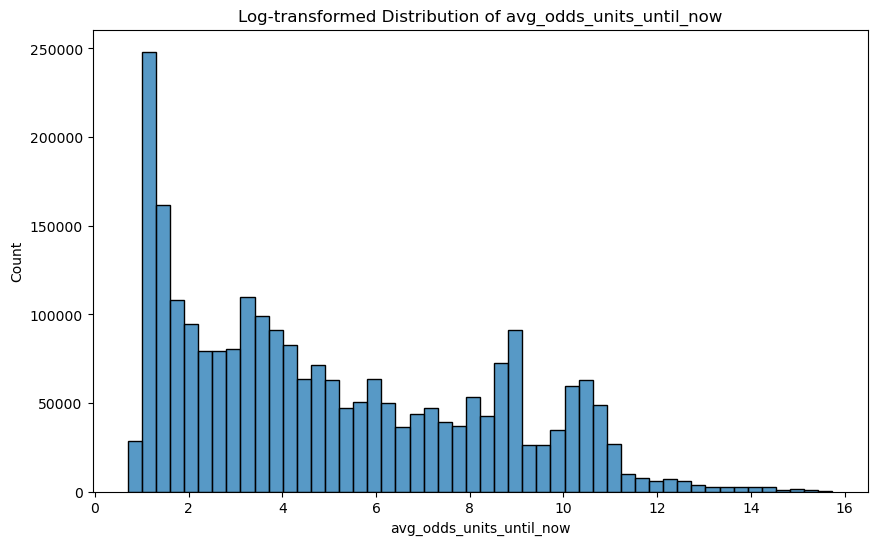

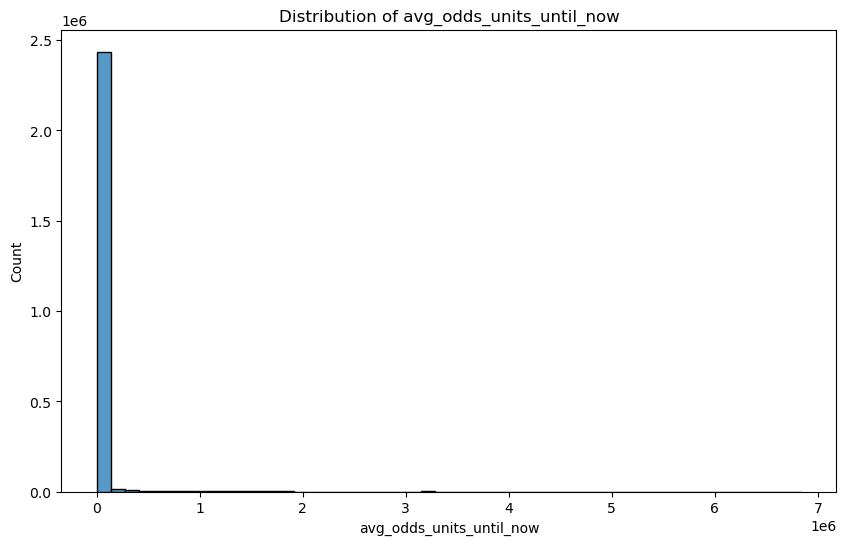

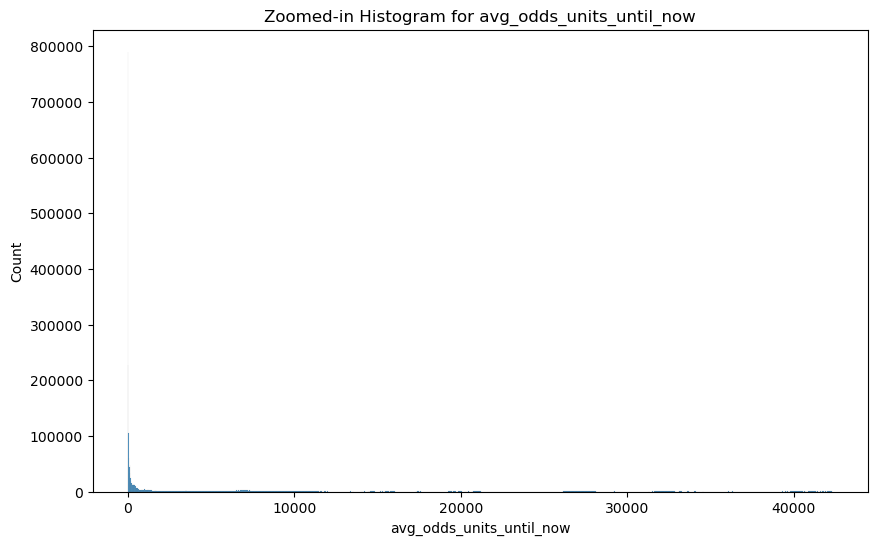

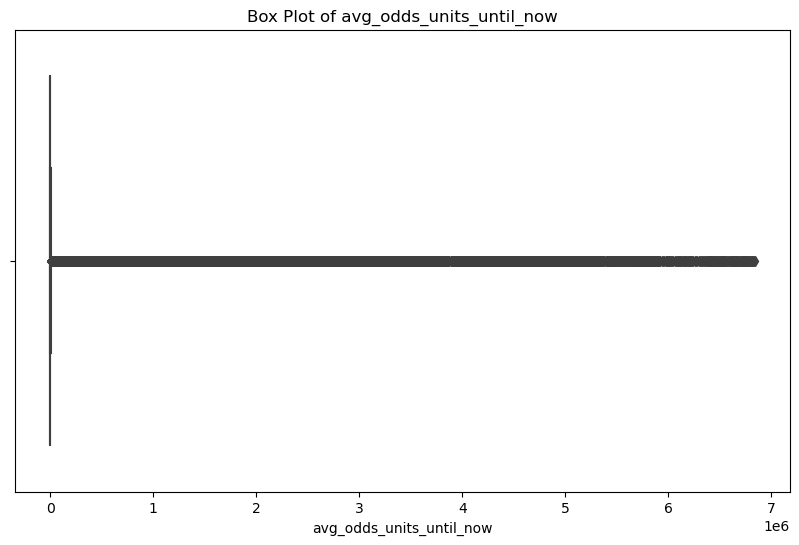

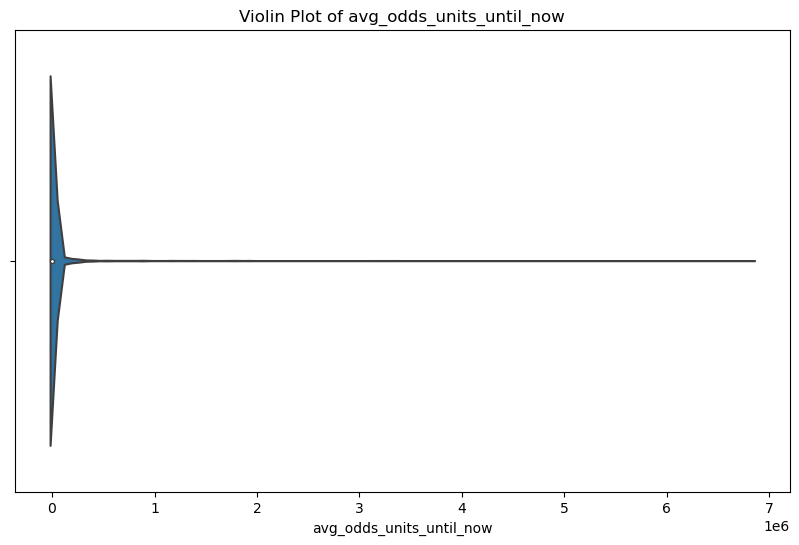

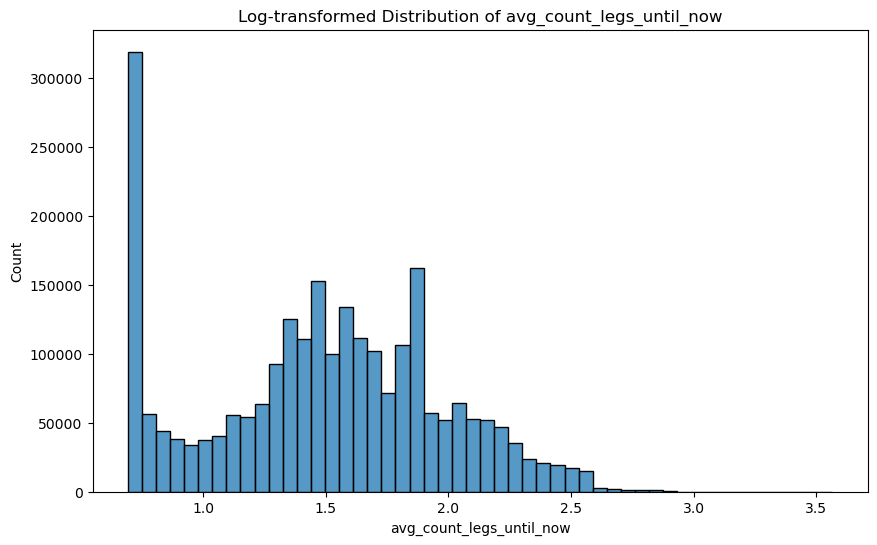

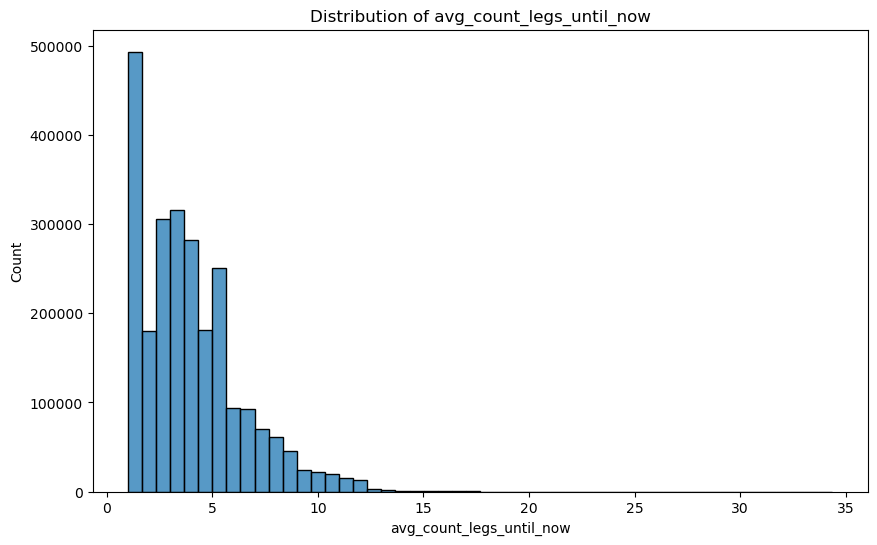

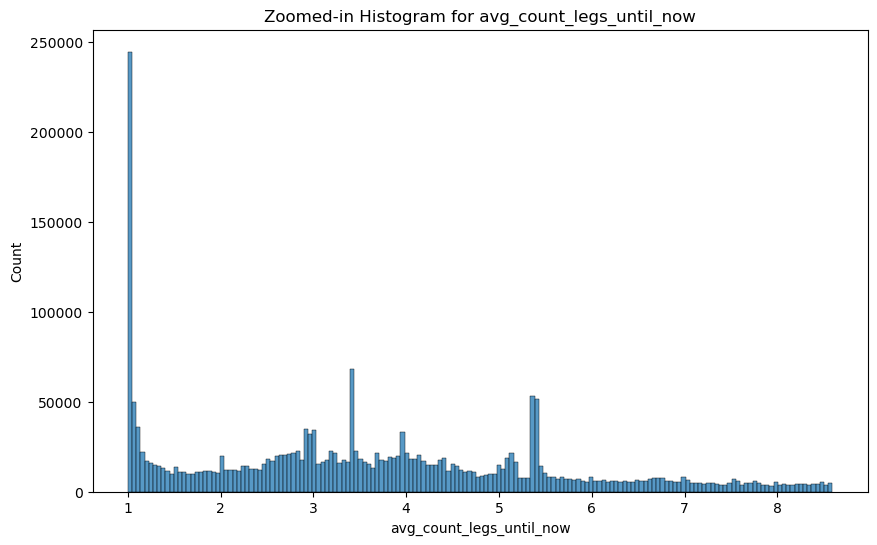

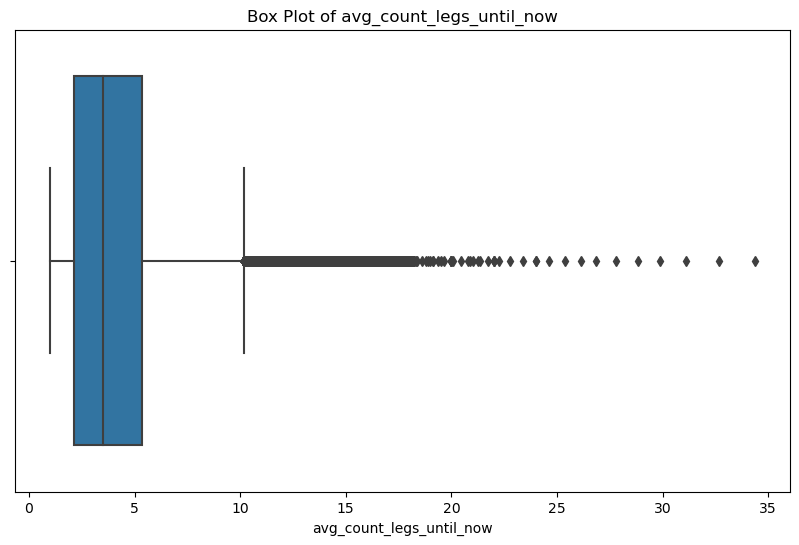

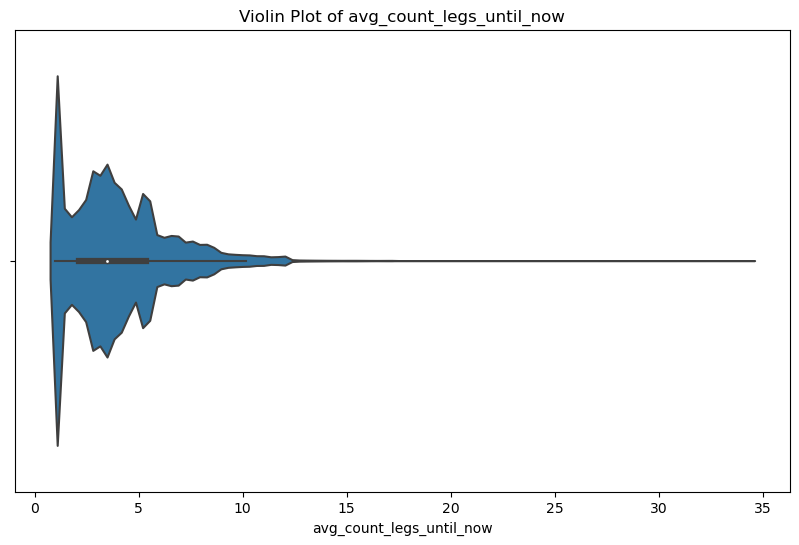

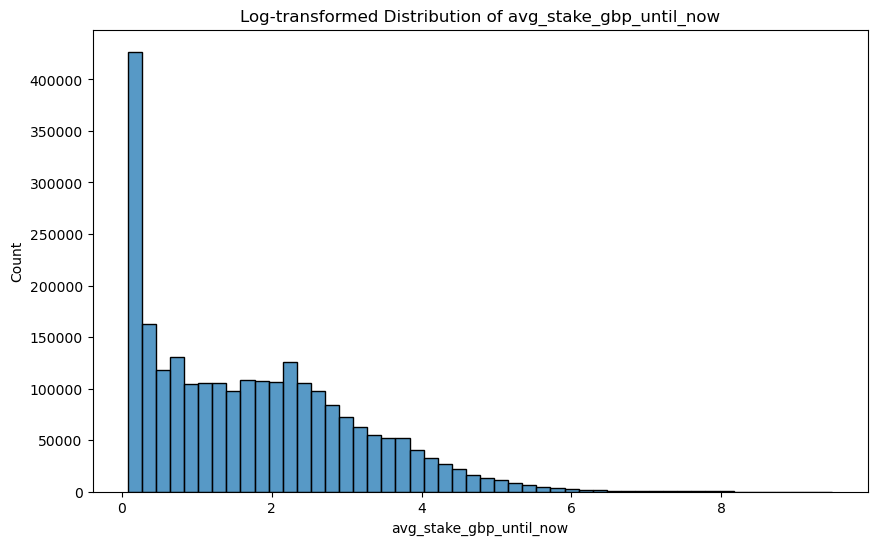

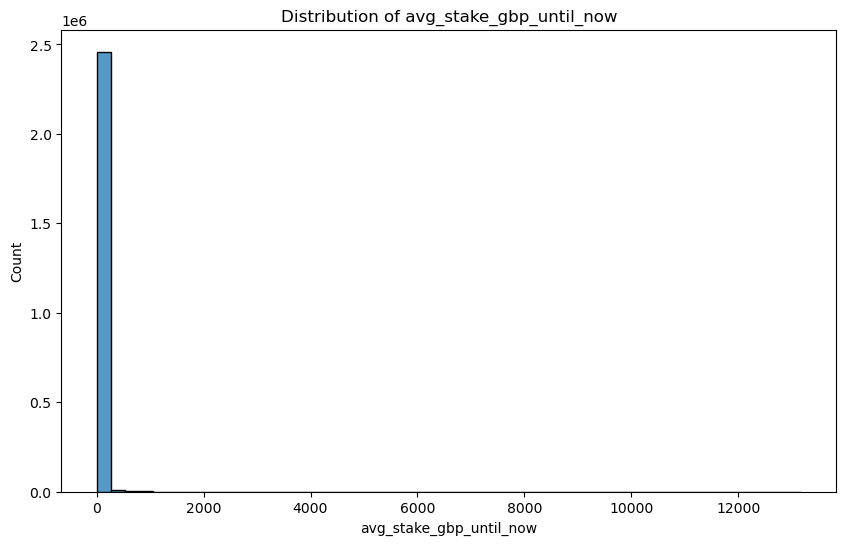

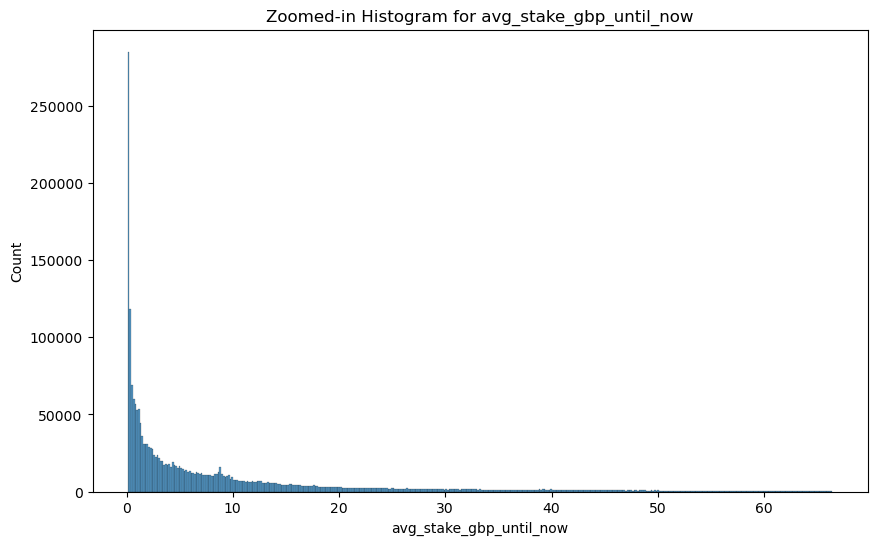

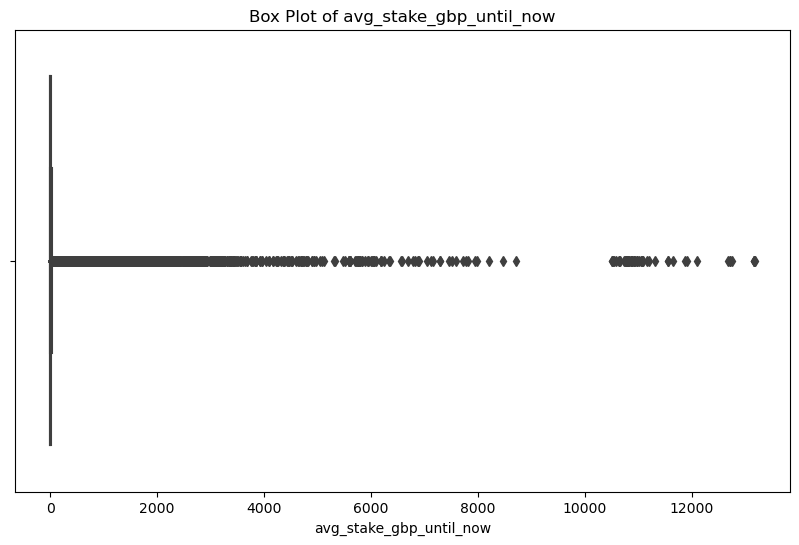

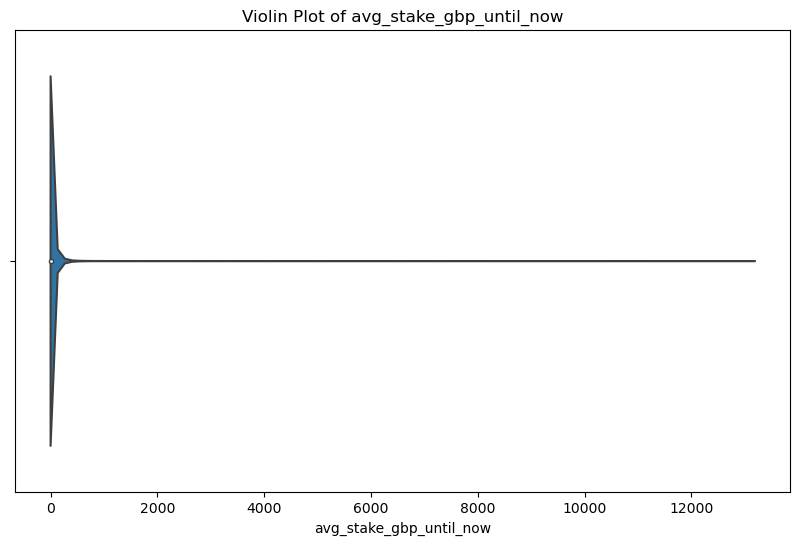

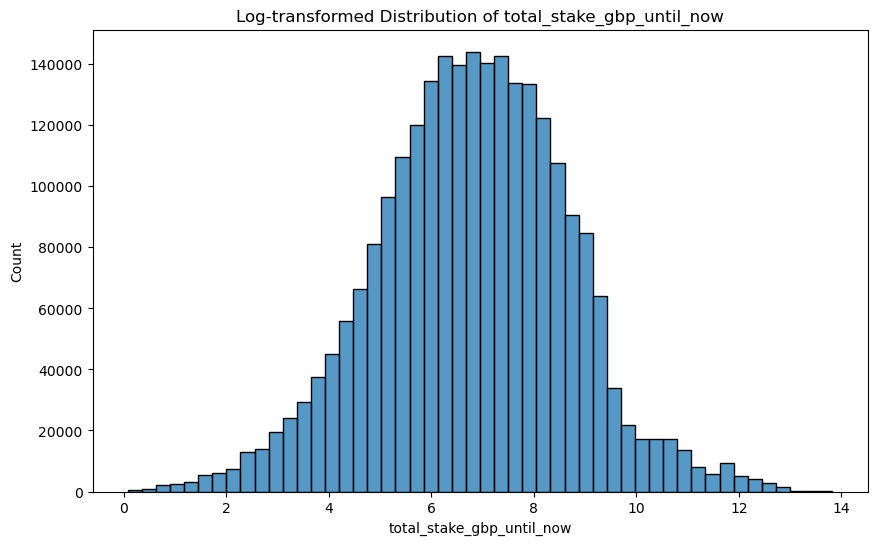

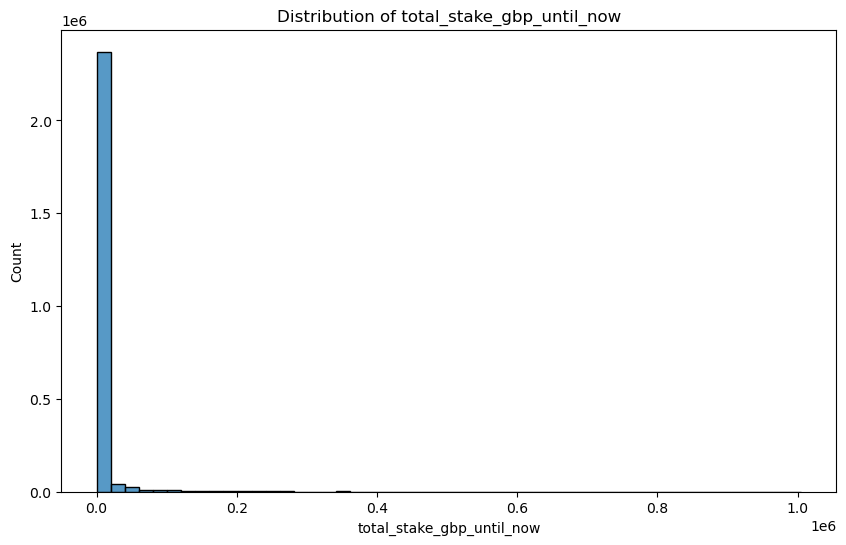

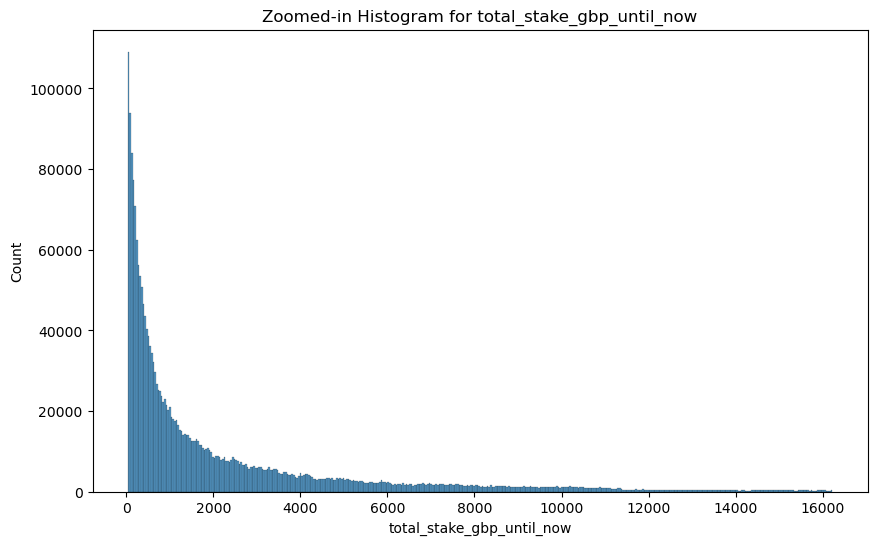

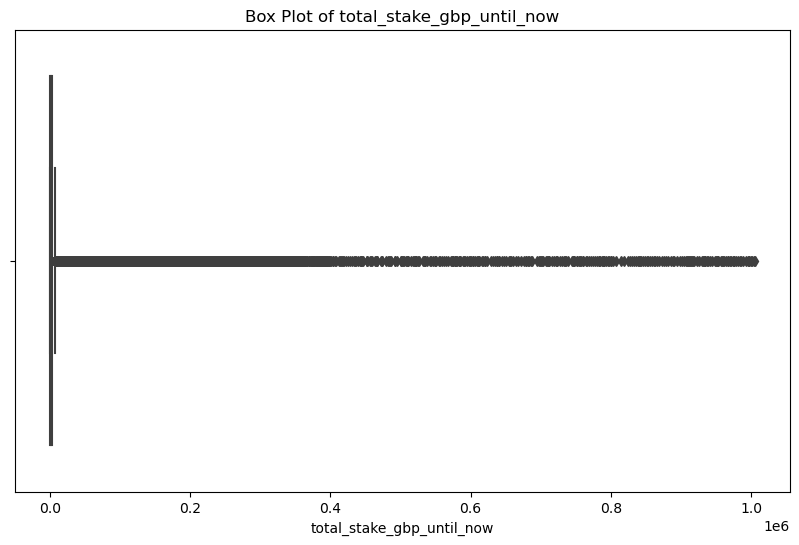

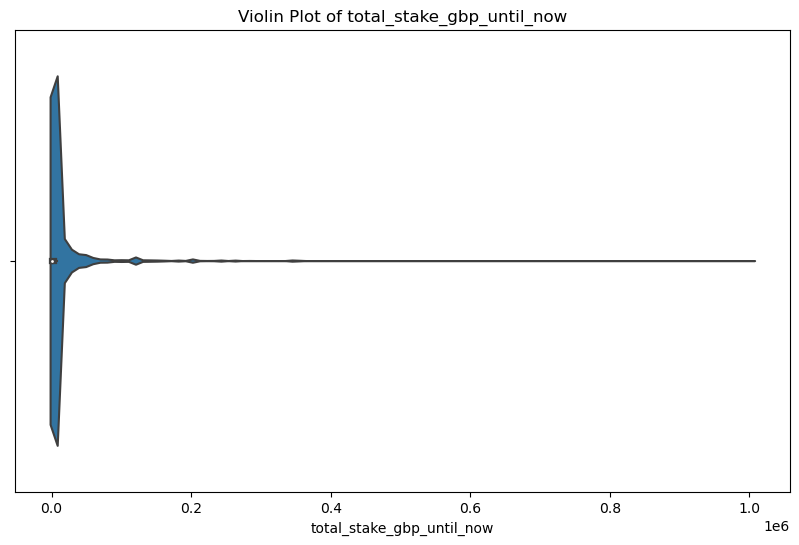

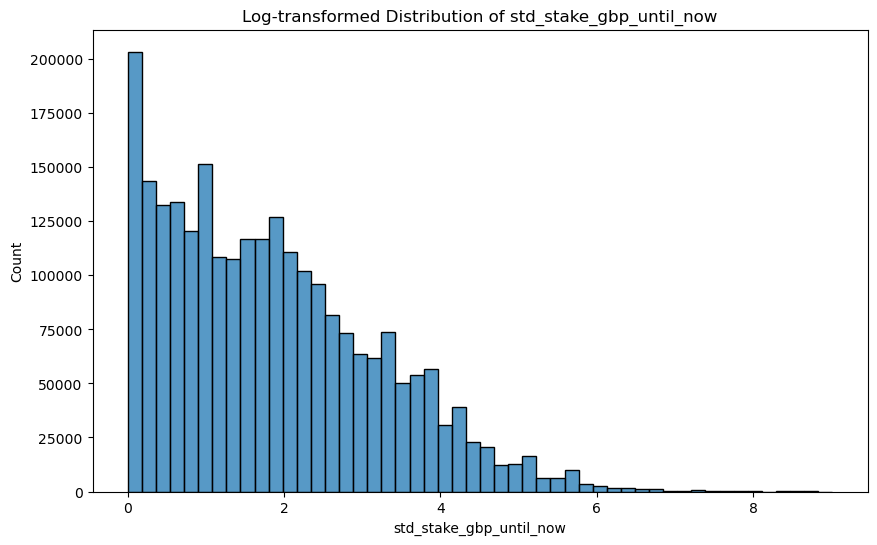

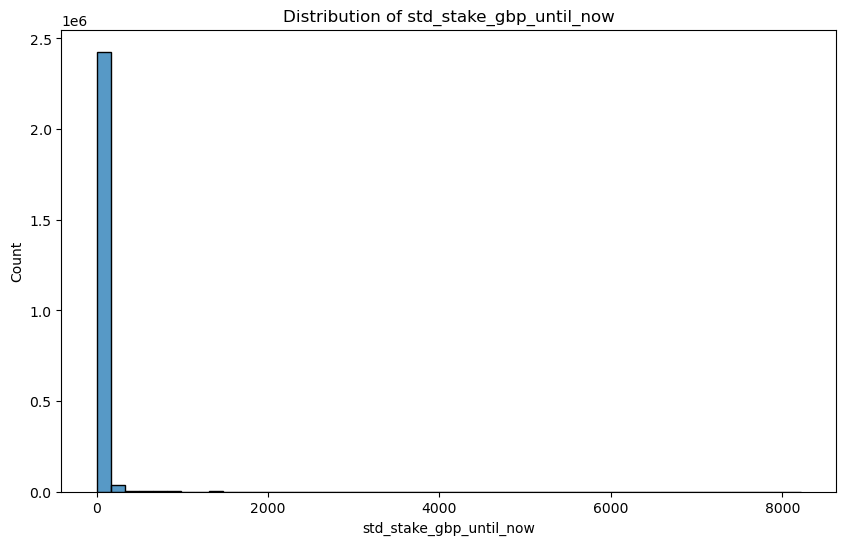

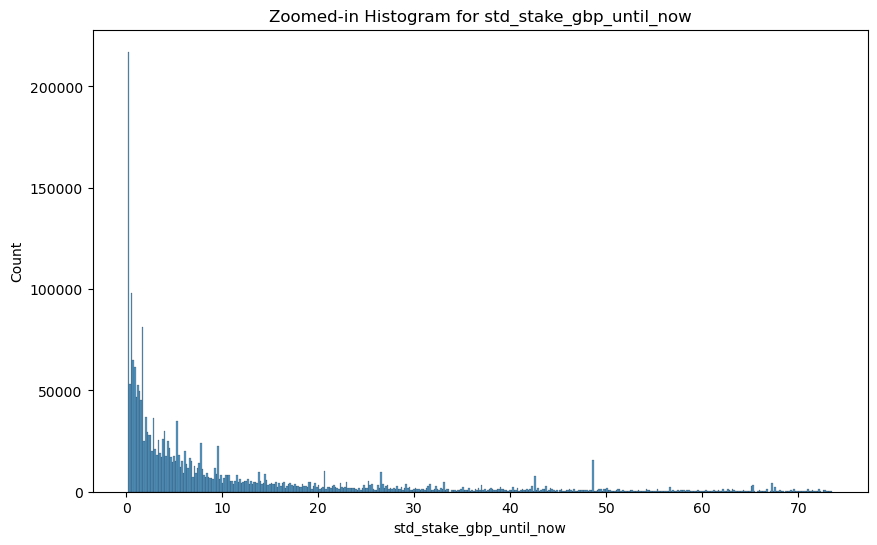

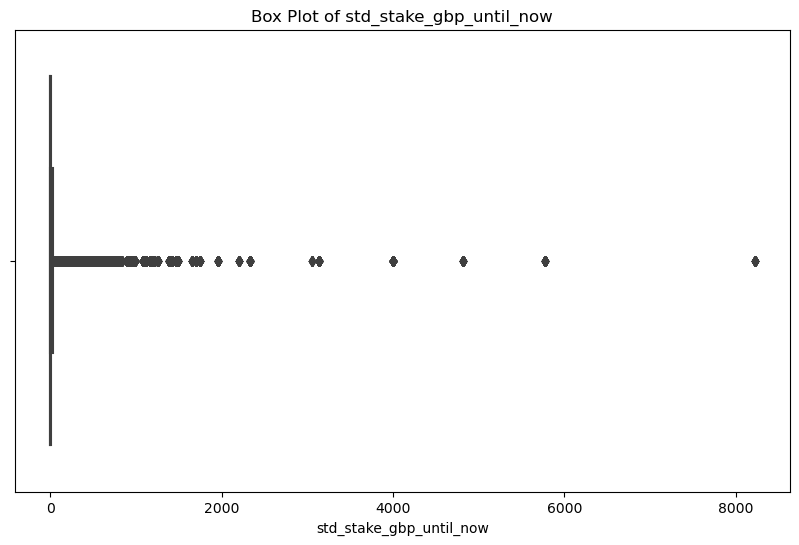

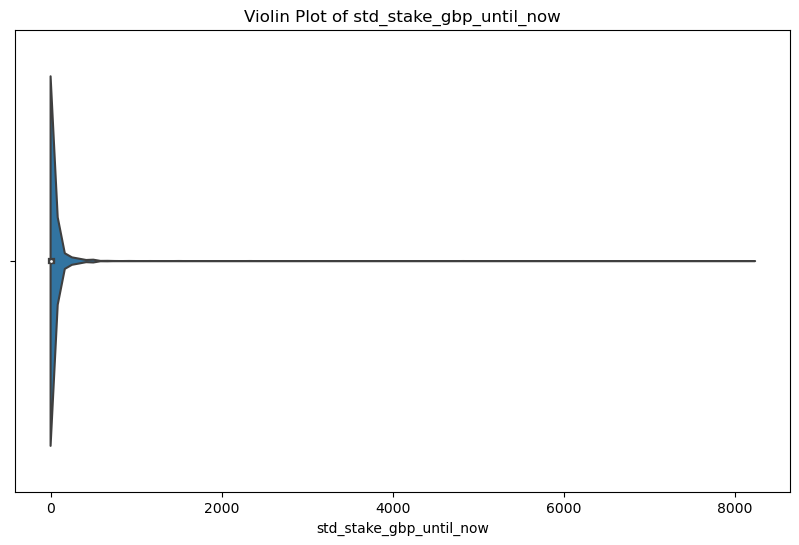

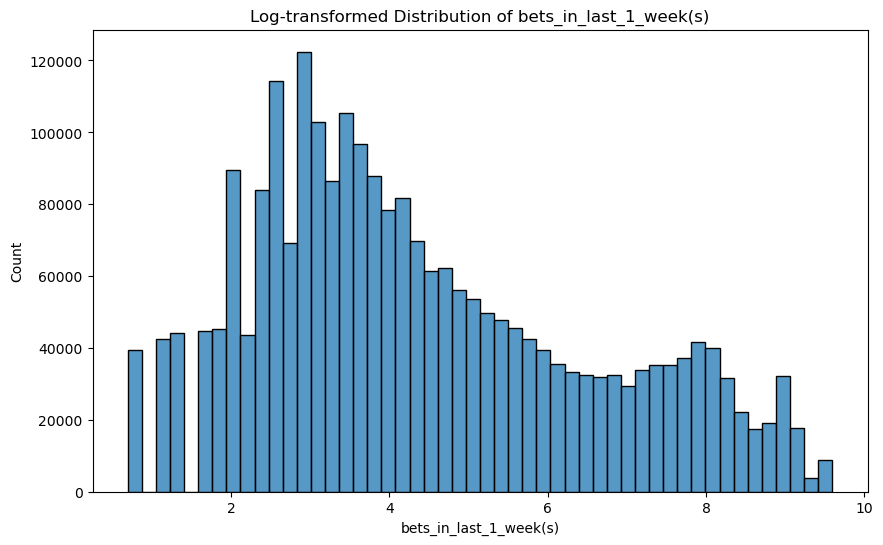

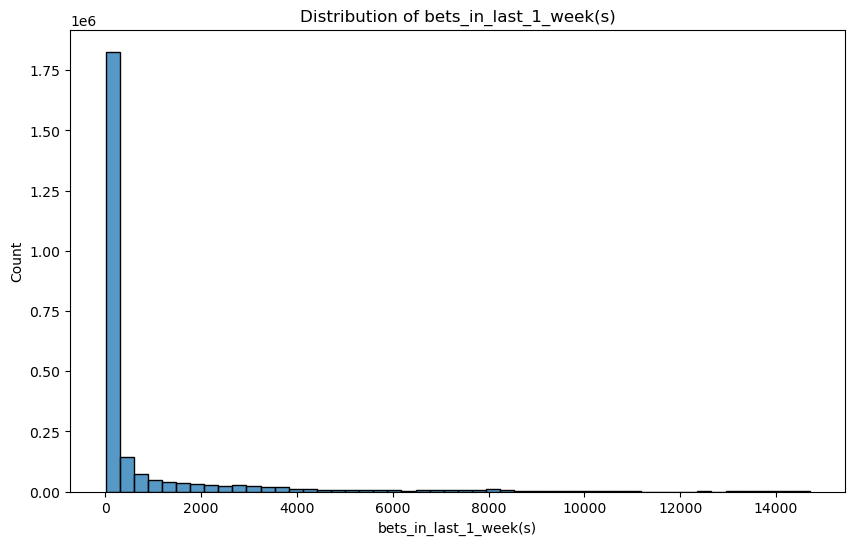

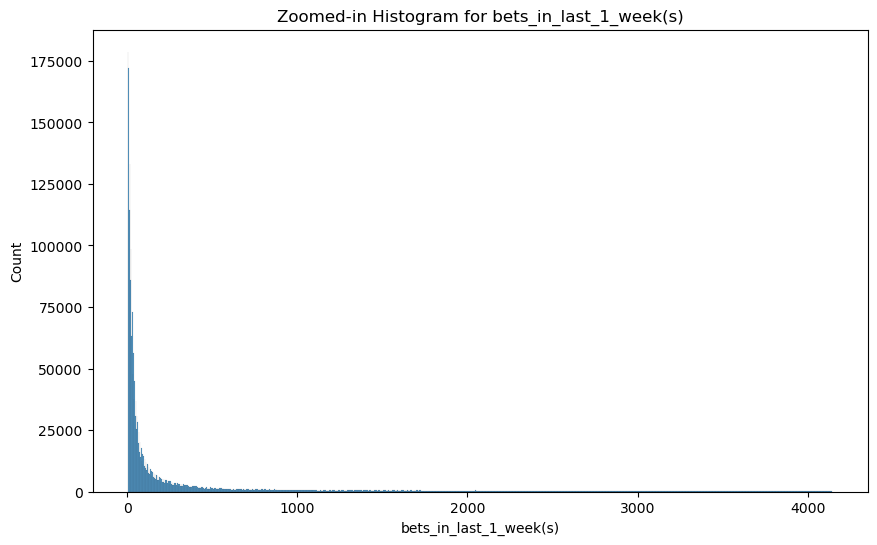

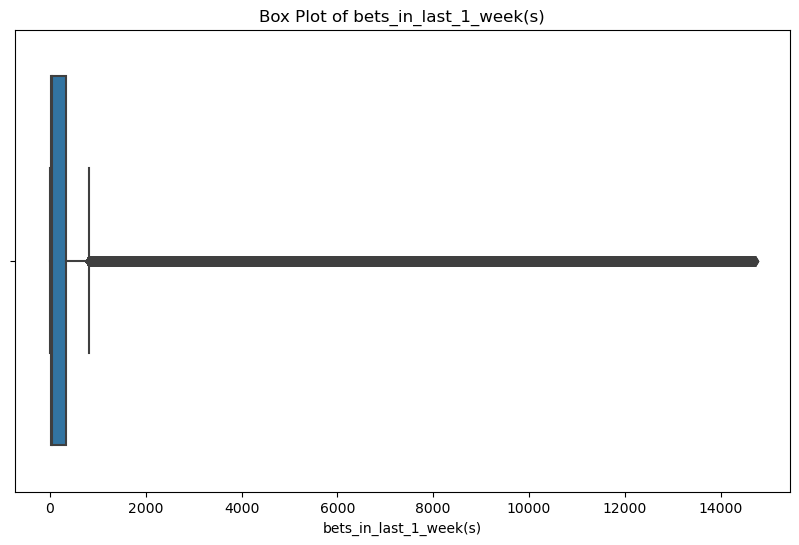

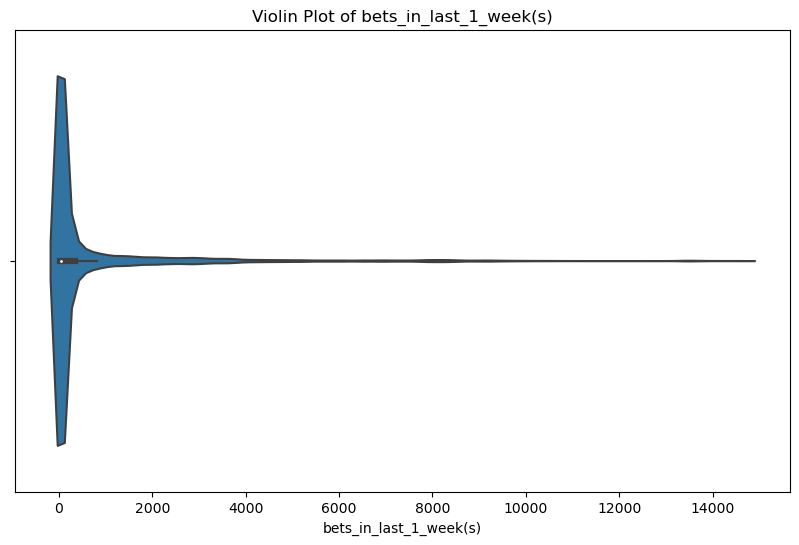

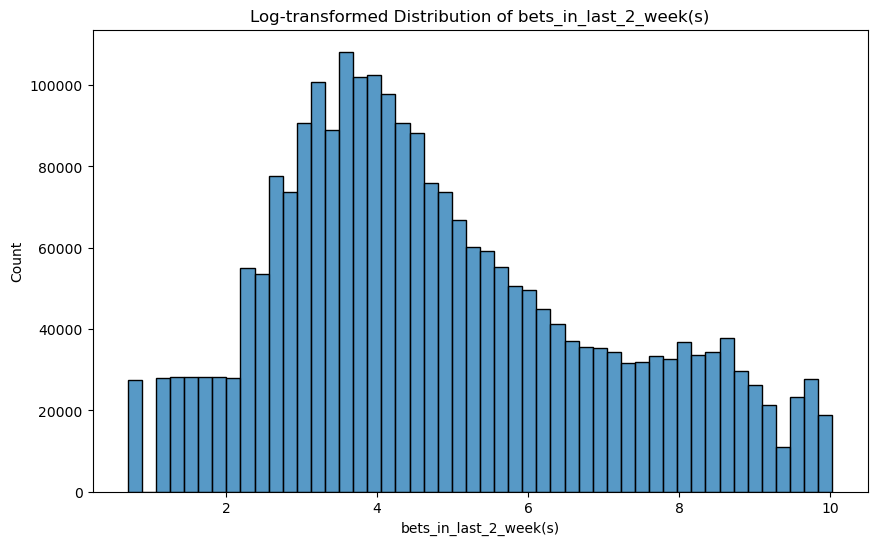

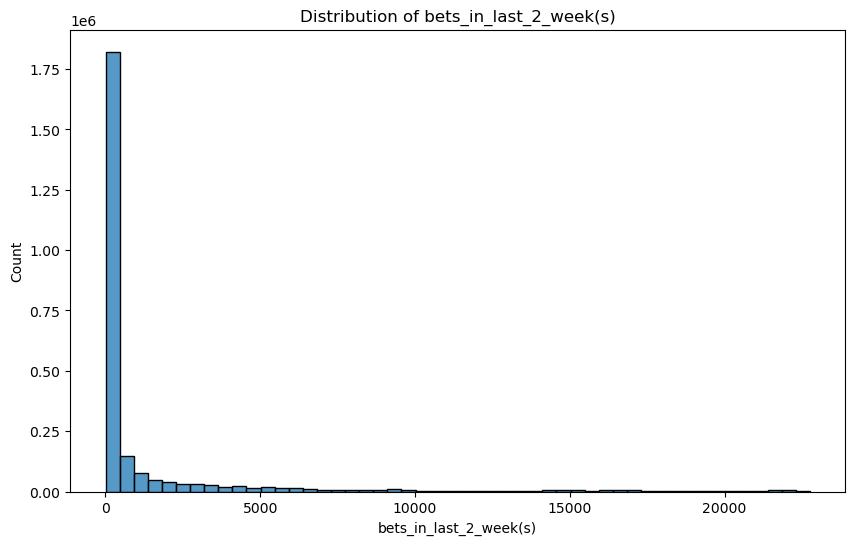

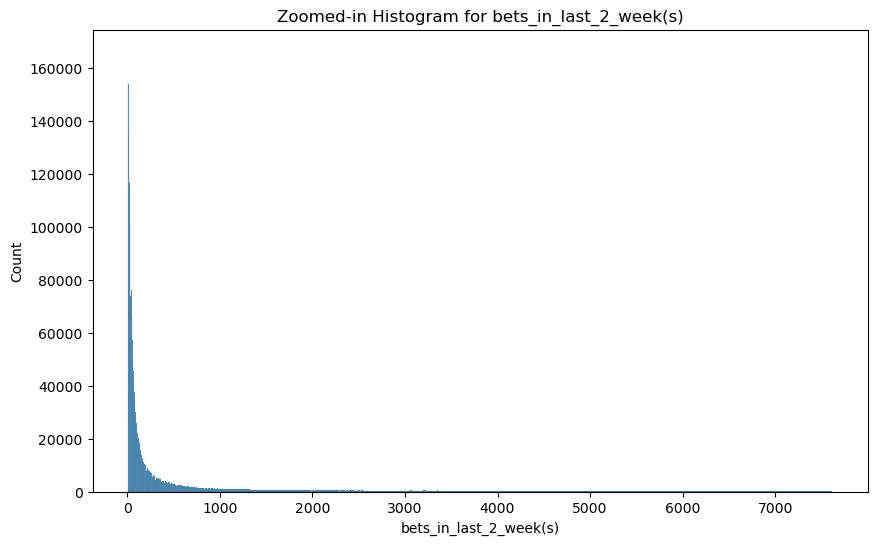

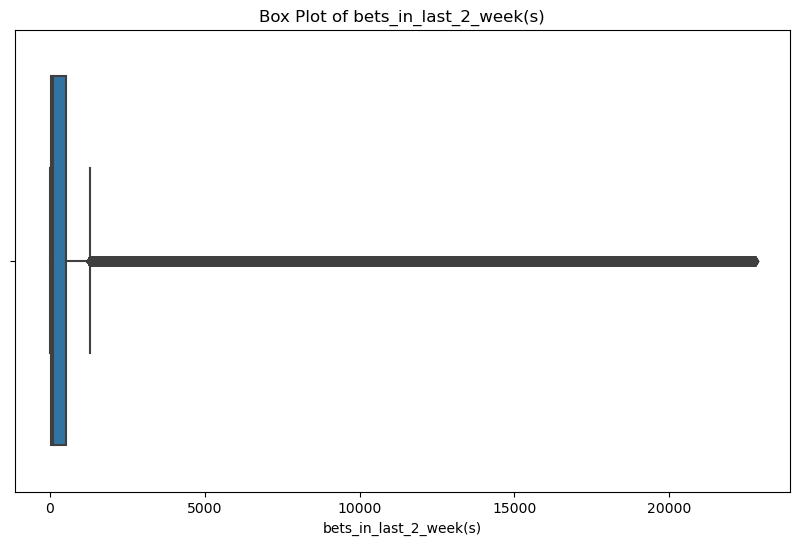

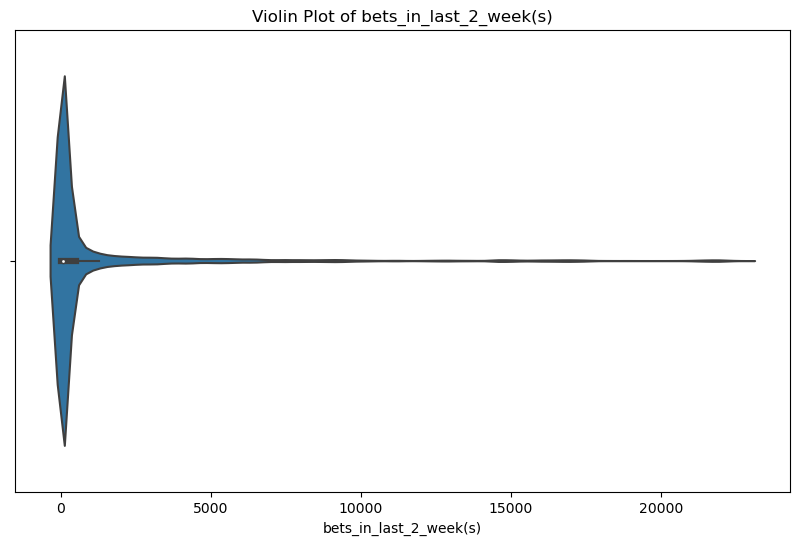

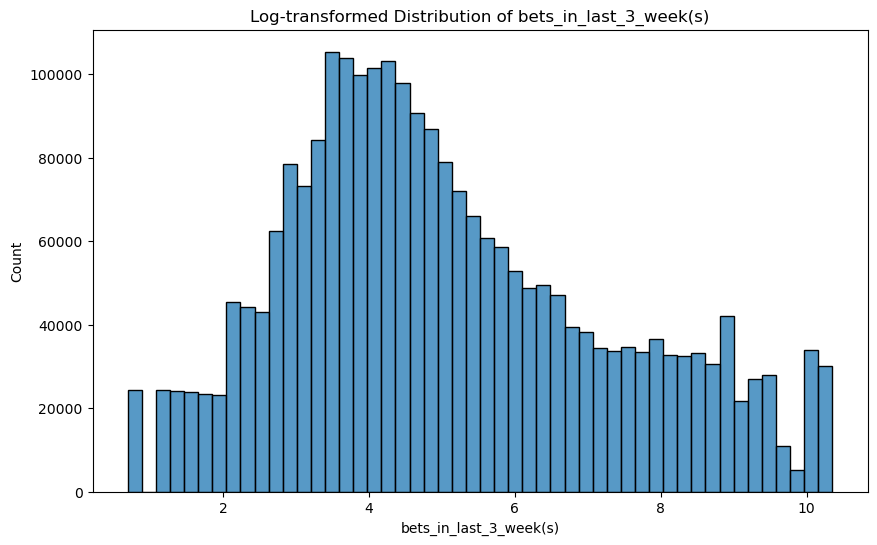

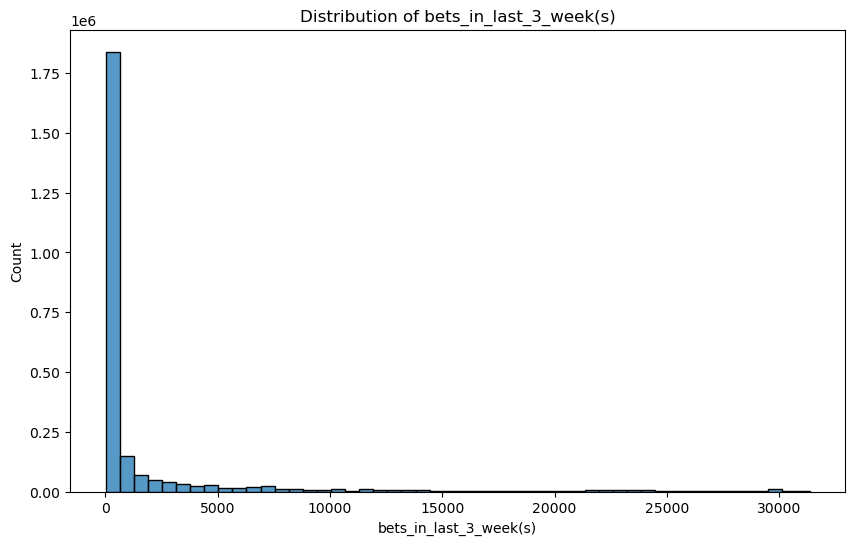

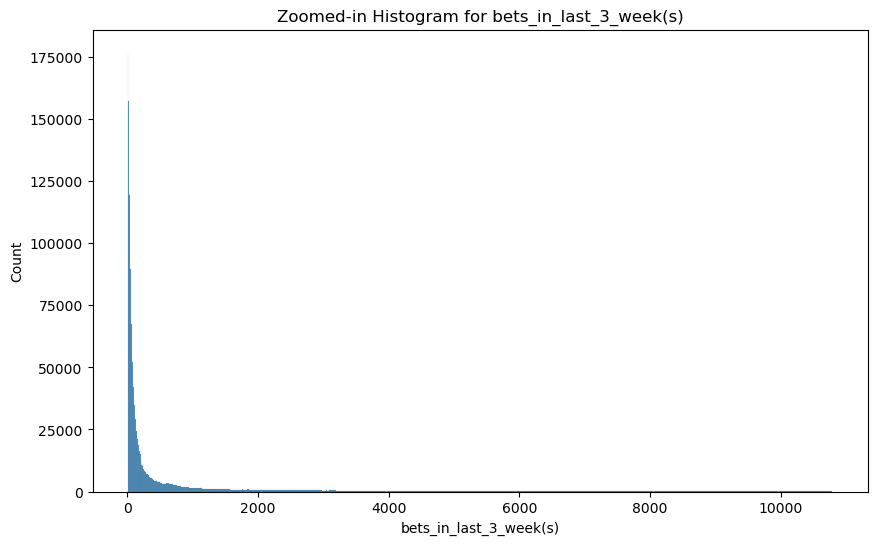

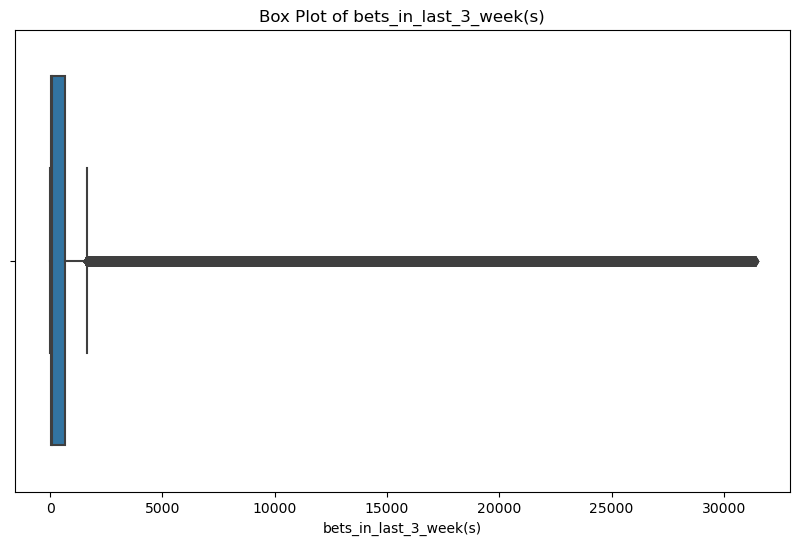

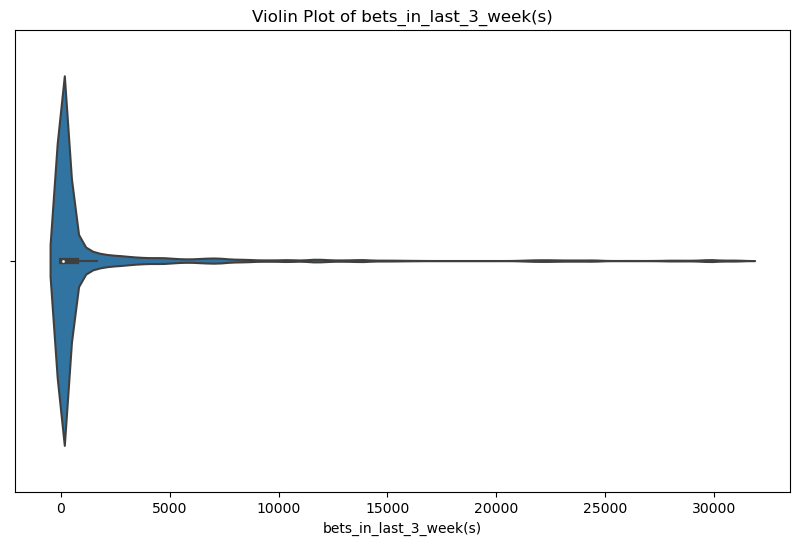

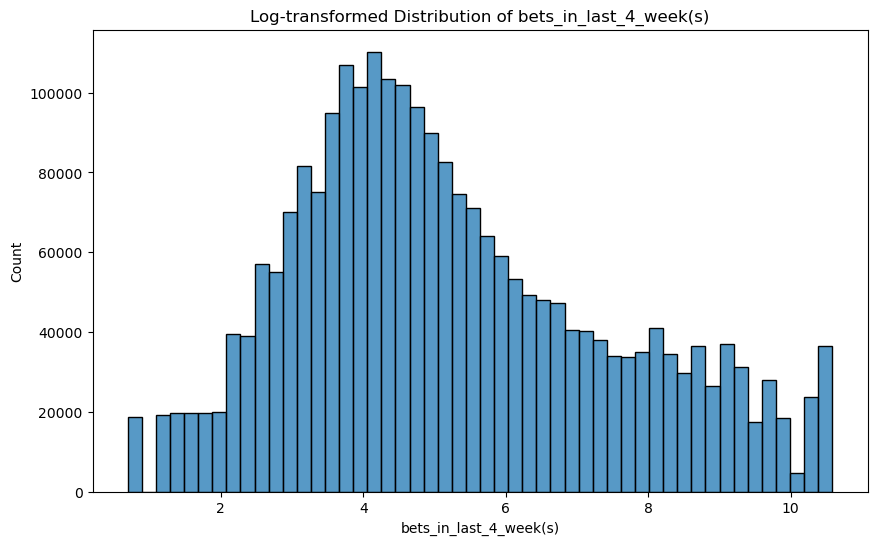

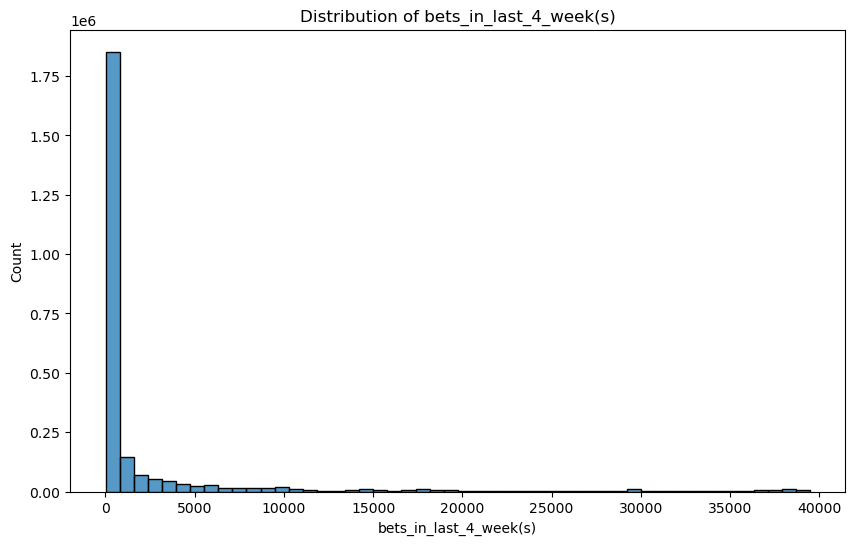

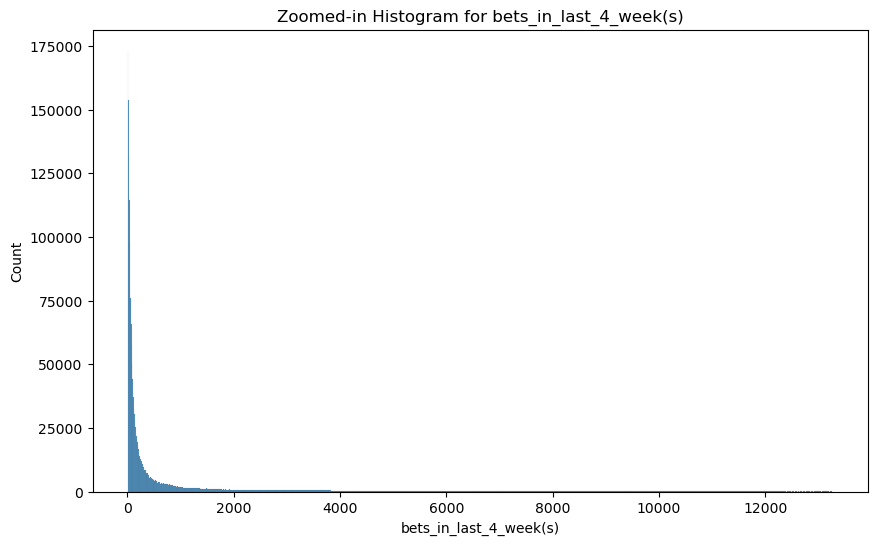

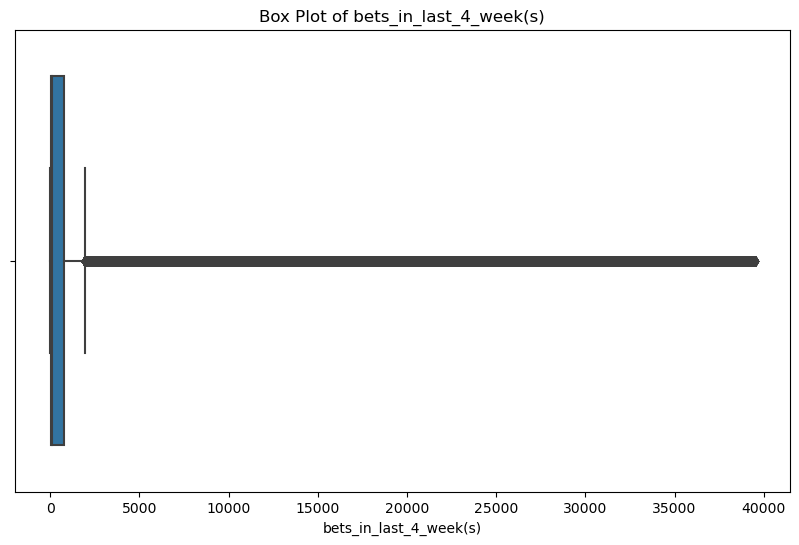

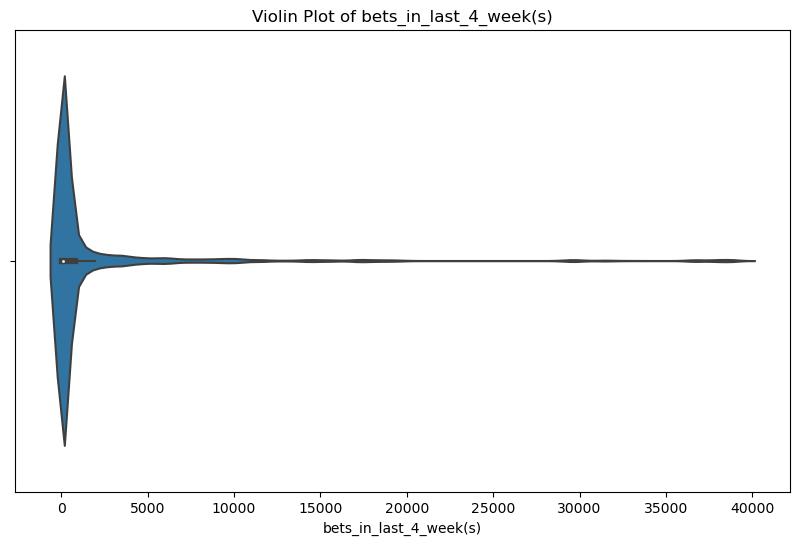

In [23]:
# Distributions of engineered features

def generate_zoomed_histogram(data, column_name):
    lower_limit = data[column_name].quantile(0.05)
    upper_limit = data[column_name].quantile(0.95)
    restricted_data = data[(data[column_name] >= lower_limit) & (data[column_name] <= upper_limit)]

    iqr = restricted_data[column_name].quantile(0.75) - restricted_data[column_name].quantile(0.25)
    bin_width = 2 * iqr * (len(restricted_data[column_name])**(-1/3))
    
    # Check for bin_width being zero
    if bin_width == 0:
        print(f"Skipping zoomed histogram for {column_name} due to zero bin width.")
        return
    
    bins = int((upper_limit - lower_limit) / bin_width)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(restricted_data[column_name], bins=bins)
    plt.title(f'Zoomed-in Histogram for {column_name}')
    plt.show()

# Define a function to create various plots for a given dataset and column name
def generate_plots(data, column_name):
    # 1. Log-transformed Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(np.log1p(data[column_name]), bins=50)
    plt.title(f'Log-transformed Distribution of {column_name}')
    plt.show()

    #2. Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot((data[column_name]), bins=50)
    plt.title(f'Distribution of {column_name}')
    plt.show()

    # 3. Zoomed-in Histogram (Modify the upper_limit based on the data's range)
    generate_zoomed_histogram(data, column_name)

    # 4. Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.show()

    # 5. Violin Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[column_name])
    plt.title(f'Violin Plot of {column_name}')
    plt.show()

# Iterate over engineered features in labelled_df dataset and generate plots
for column in engineered_features:
    generate_plots(labelled_df, column)

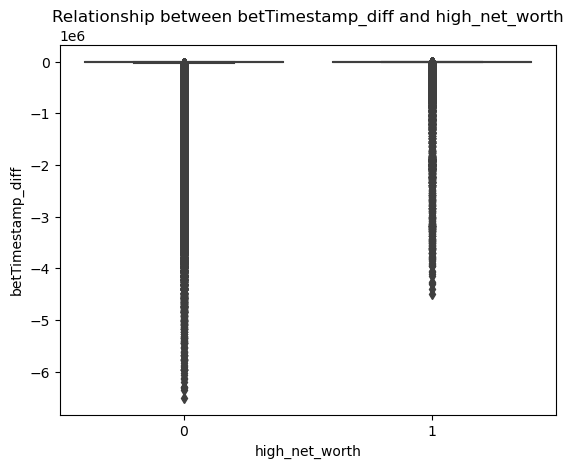

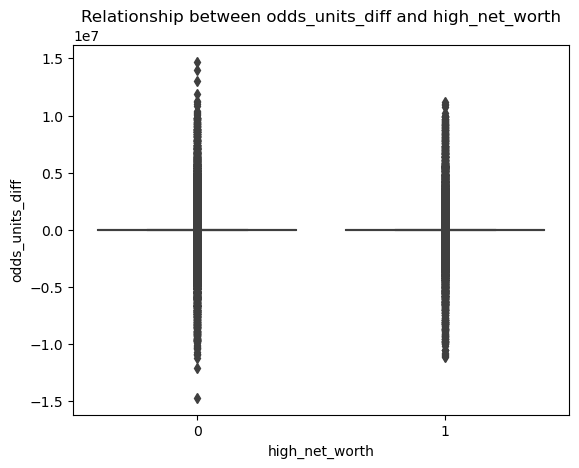

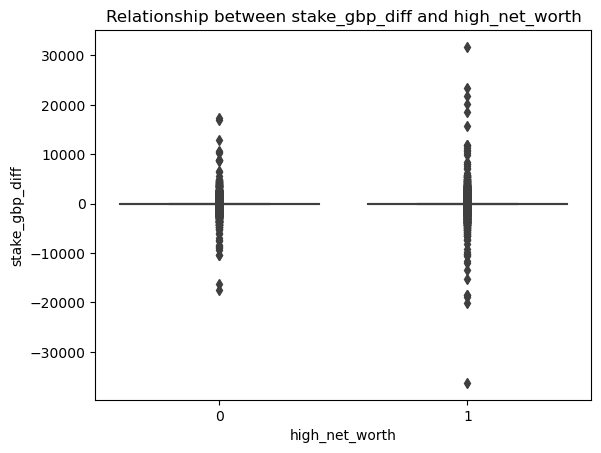

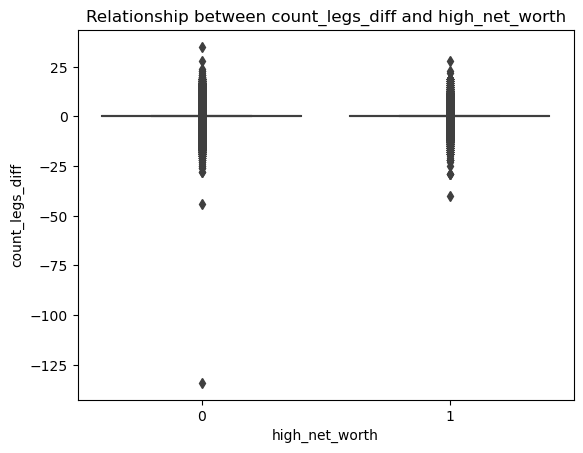

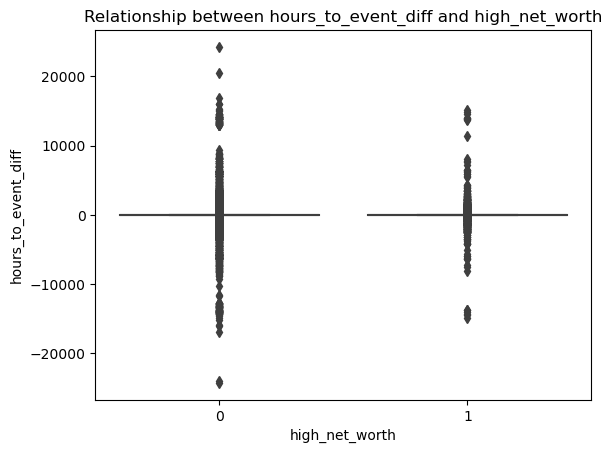

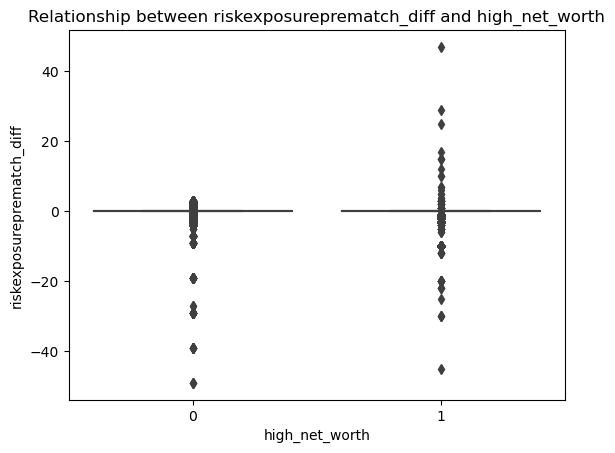

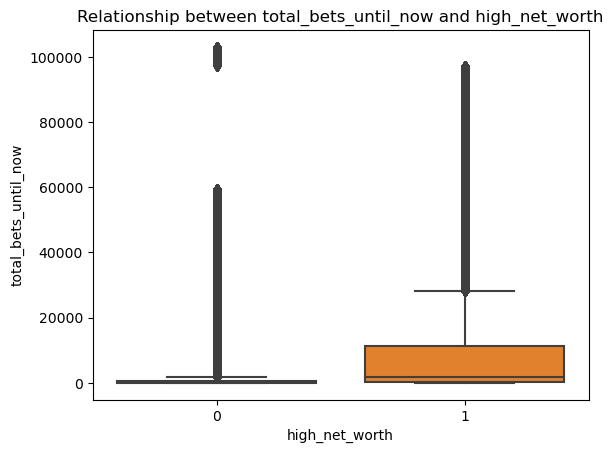

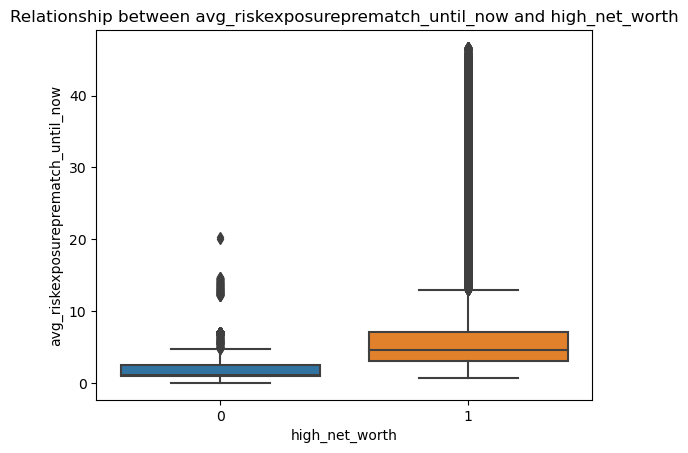

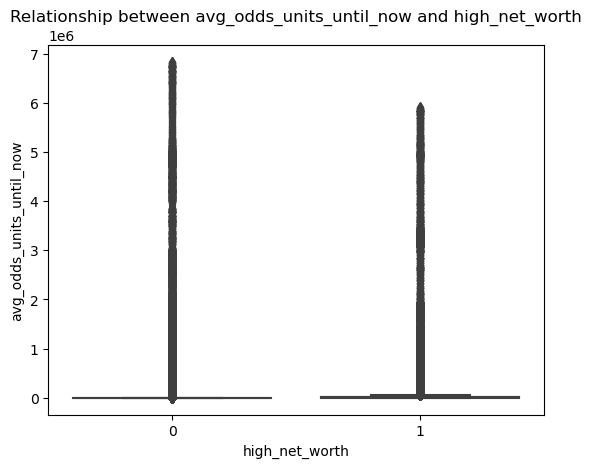

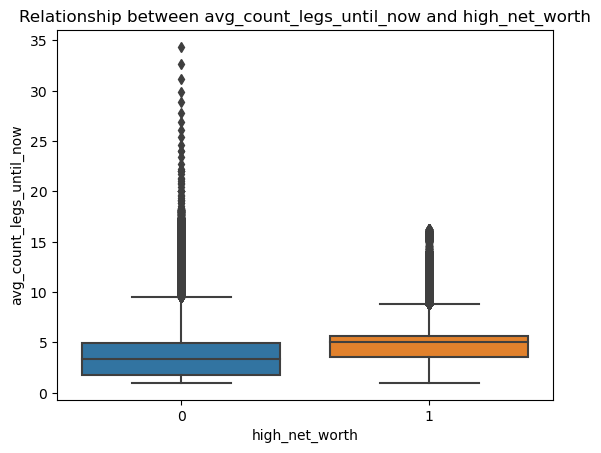

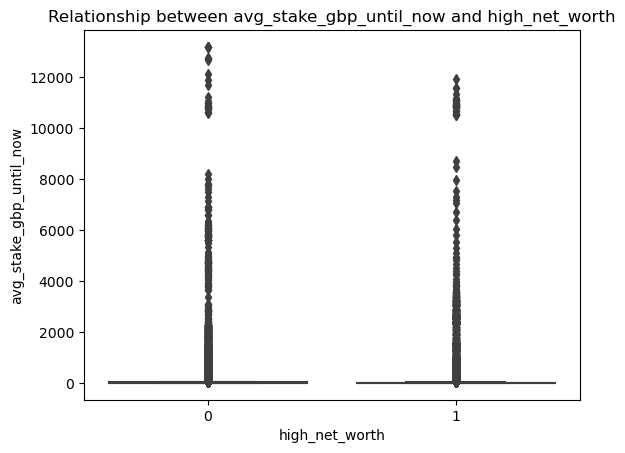

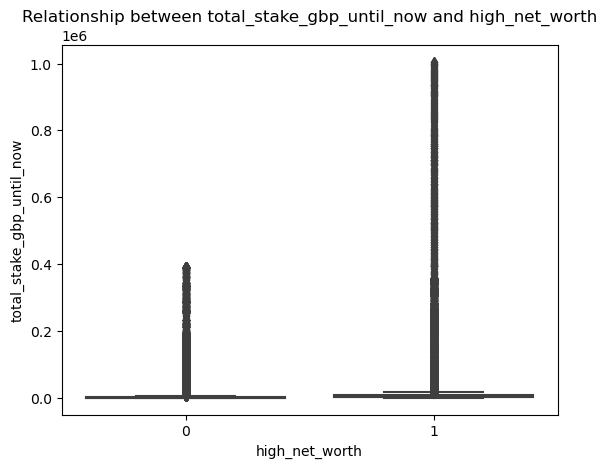

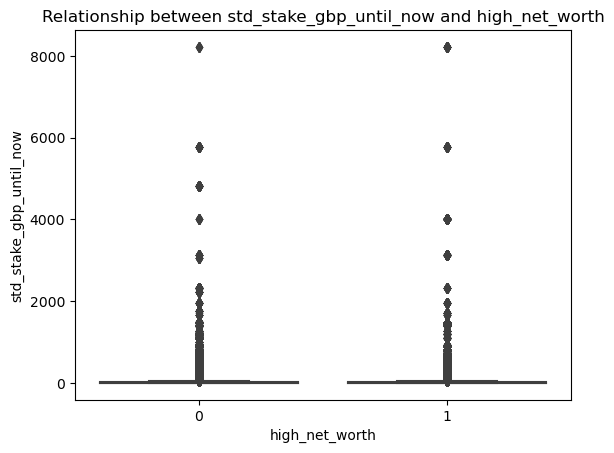

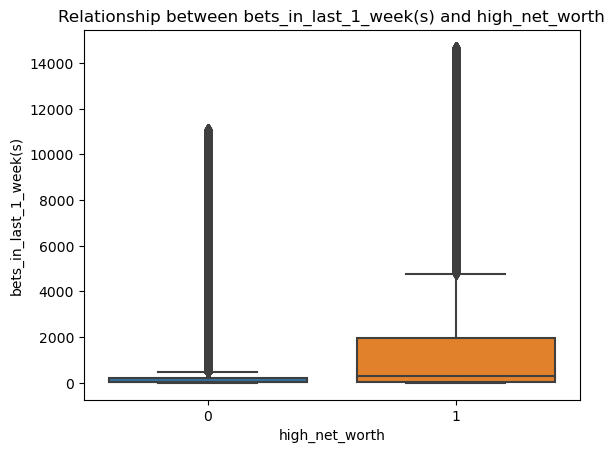

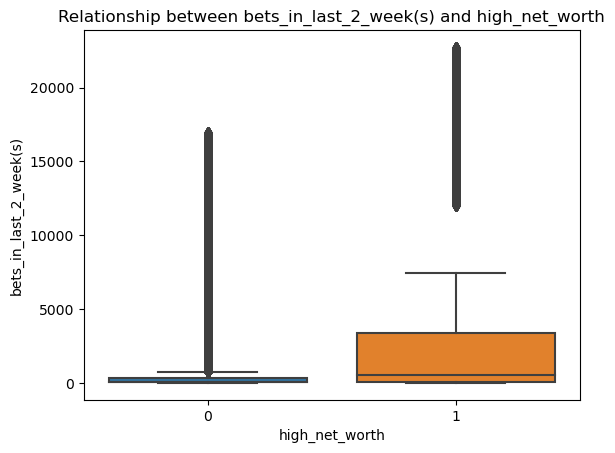

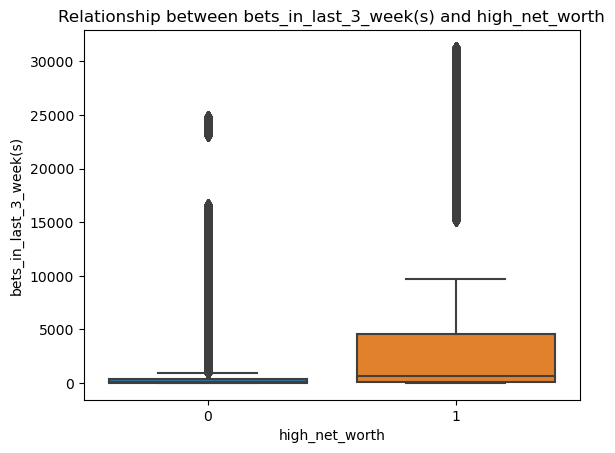

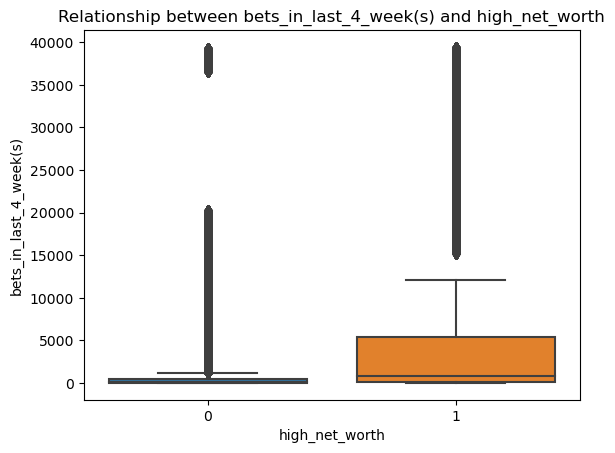

In [24]:
# Relationship Between Features and the Target
for feature in engineered_features:
    sns.boxplot(x='high_net_worth', y=feature, data=labelled_df)
    plt.title(f'Relationship between {feature} and high_net_worth')
    plt.show()

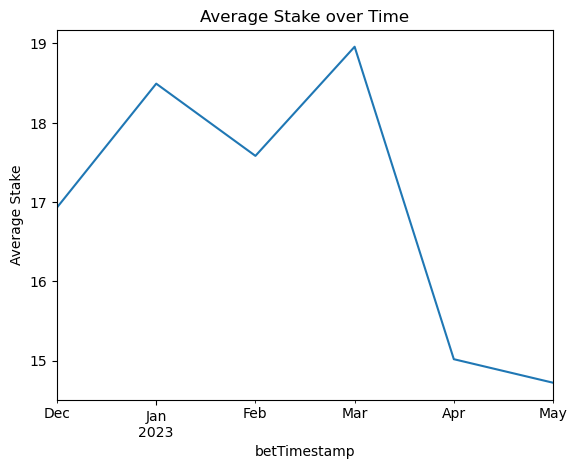

In [25]:
# Temporal Analysis of Average Stake

labelled_df['betTimestamp'] = pd.to_datetime(labelled_df['betTimestamp'])
labelled_df.set_index('betTimestamp', inplace=True)

# Example: How does the average stake change over time?
labelled_df.resample('M')['stake_gbp'].mean().plot()
plt.title('Average Stake over Time')
plt.ylabel('Average Stake')
plt.show()


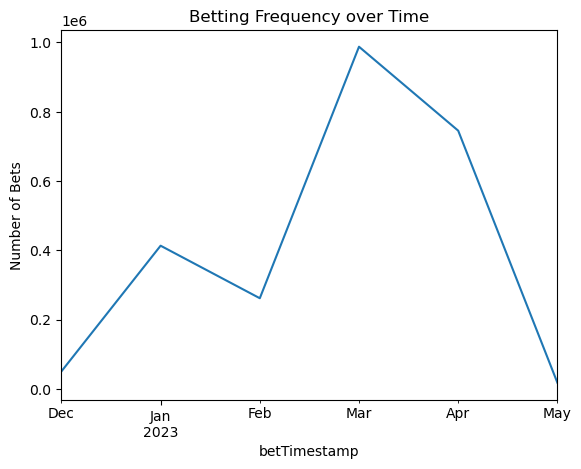

In [26]:
# Temporal Analysis of Betting Frequency

labelled_df.resample('M').size().plot()
plt.title('Betting Frequency over Time')
plt.ylabel('Number of Bets')
plt.show()


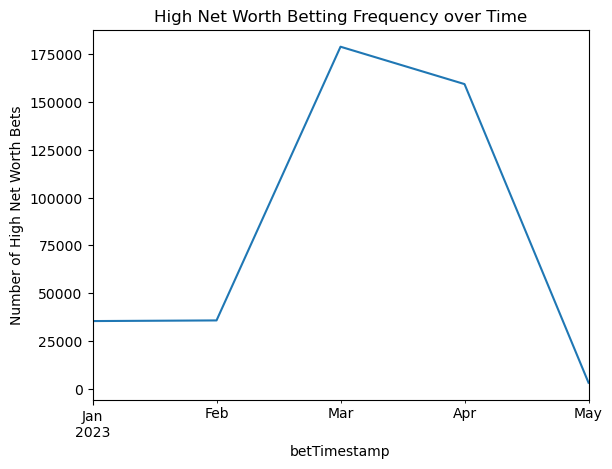

In [34]:
# Temporal Analysis of HNW Betting Frequency

labelled_df[labelled_df['high_net_worth'] == 1].resample('M').size().plot()
plt.title('High Net Worth Betting Frequency over Time')
plt.ylabel('Number of High Net Worth Bets')
plt.show()

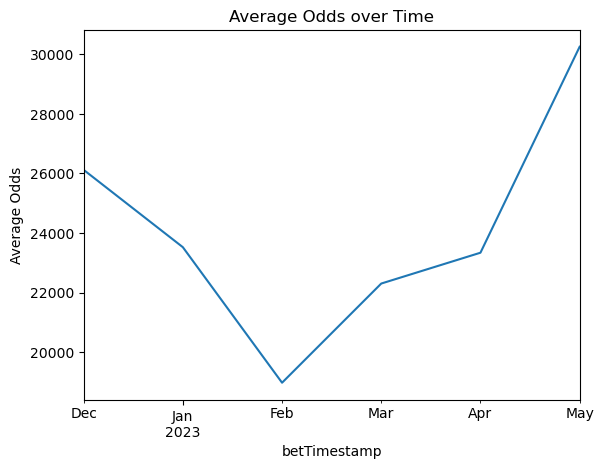

In [27]:
# Temporal Analysis of Average Odds

labelled_df.resample('M')['odds_units'].mean().plot()
plt.title('Average Odds over Time')
plt.ylabel('Average Odds')
plt.show()


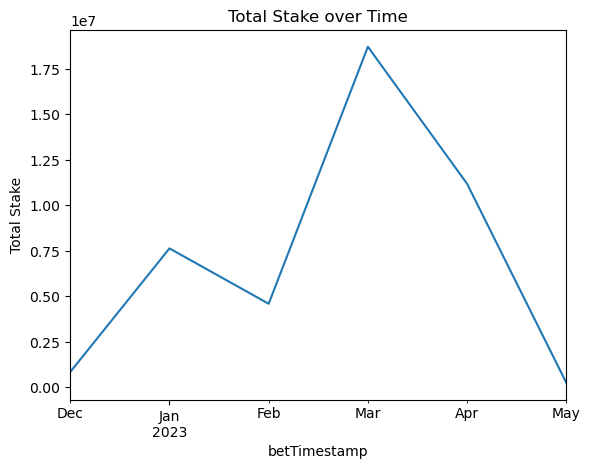

In [28]:
# Temporal Analysis of Total Stake

labelled_df.resample('M')['stake_gbp'].sum().plot()
plt.title('Total Stake over Time')
plt.ylabel('Total Stake')
plt.show()


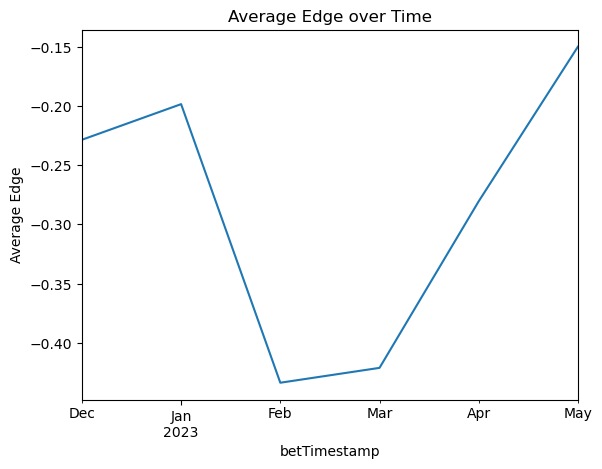

In [29]:
# Temporal Analysis of Average Edge

labelled_df.resample('M')['edge'].mean().plot()
plt.title('Average Edge over Time')
plt.ylabel('Average Edge')
plt.show()


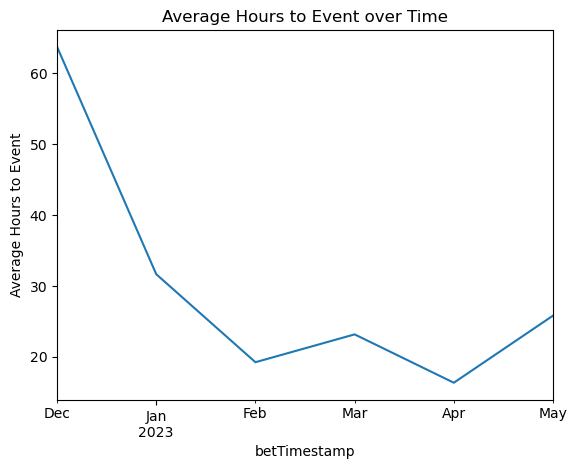

In [31]:
# Temporal Analysis of Average Hours to Event

labelled_df.resample('M')['hours_to_event'].mean().plot()
plt.title('Average Hours to Event over Time')
plt.ylabel('Average Hours to Event')
plt.show()


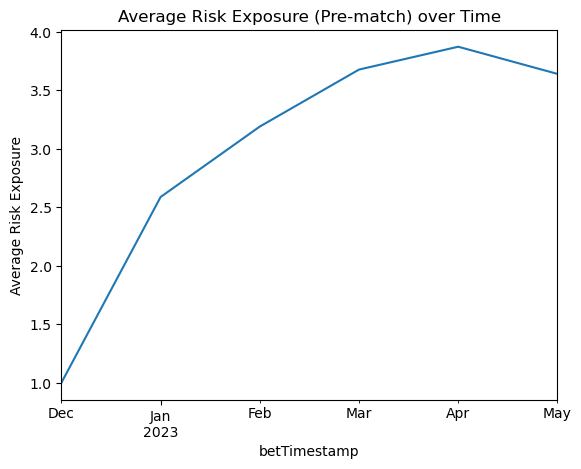

In [32]:
# Temporal Analysis of Average Risk Exposure Prematch

labelled_df.resample('M')['riskexposureprematch'].mean().plot()
plt.title('Average Risk Exposure (Pre-match) over Time')
plt.ylabel('Average Risk Exposure')
plt.show()

In [37]:
labelled_df.columns

Index(['odds_units', 'stake_gbp', 'count_legs', 'hours_to_event', 'edge',
       'encrypted_user_no', 'insert_date', 'riskexposureprematch',
       'betTimestamp_diff', 'odds_units_diff', 'stake_gbp_diff',
       'count_legs_diff', 'hours_to_event_diff', 'riskexposureprematch_diff',
       'month', 'day', 'day_of_week', 'hour', 'total_bets_until_now',
       'avg_riskexposureprematch_until_now', 'avg_odds_units_until_now',
       'avg_count_legs_until_now', 'avg_stake_gbp_until_now',
       'total_stake_gbp_until_now', 'std_stake_gbp_until_now',
       'bets_in_last_1_week(s)', 'bets_in_last_2_week(s)',
       'bets_in_last_3_week(s)', 'bets_in_last_4_week(s)', 'high_net_worth'],
      dtype='object')

/var/folders/yz/86sy0w0519d250z0rfq2qx5w0000gp/T/ipykernel_13246/3937752749.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = labelled_df.corr()


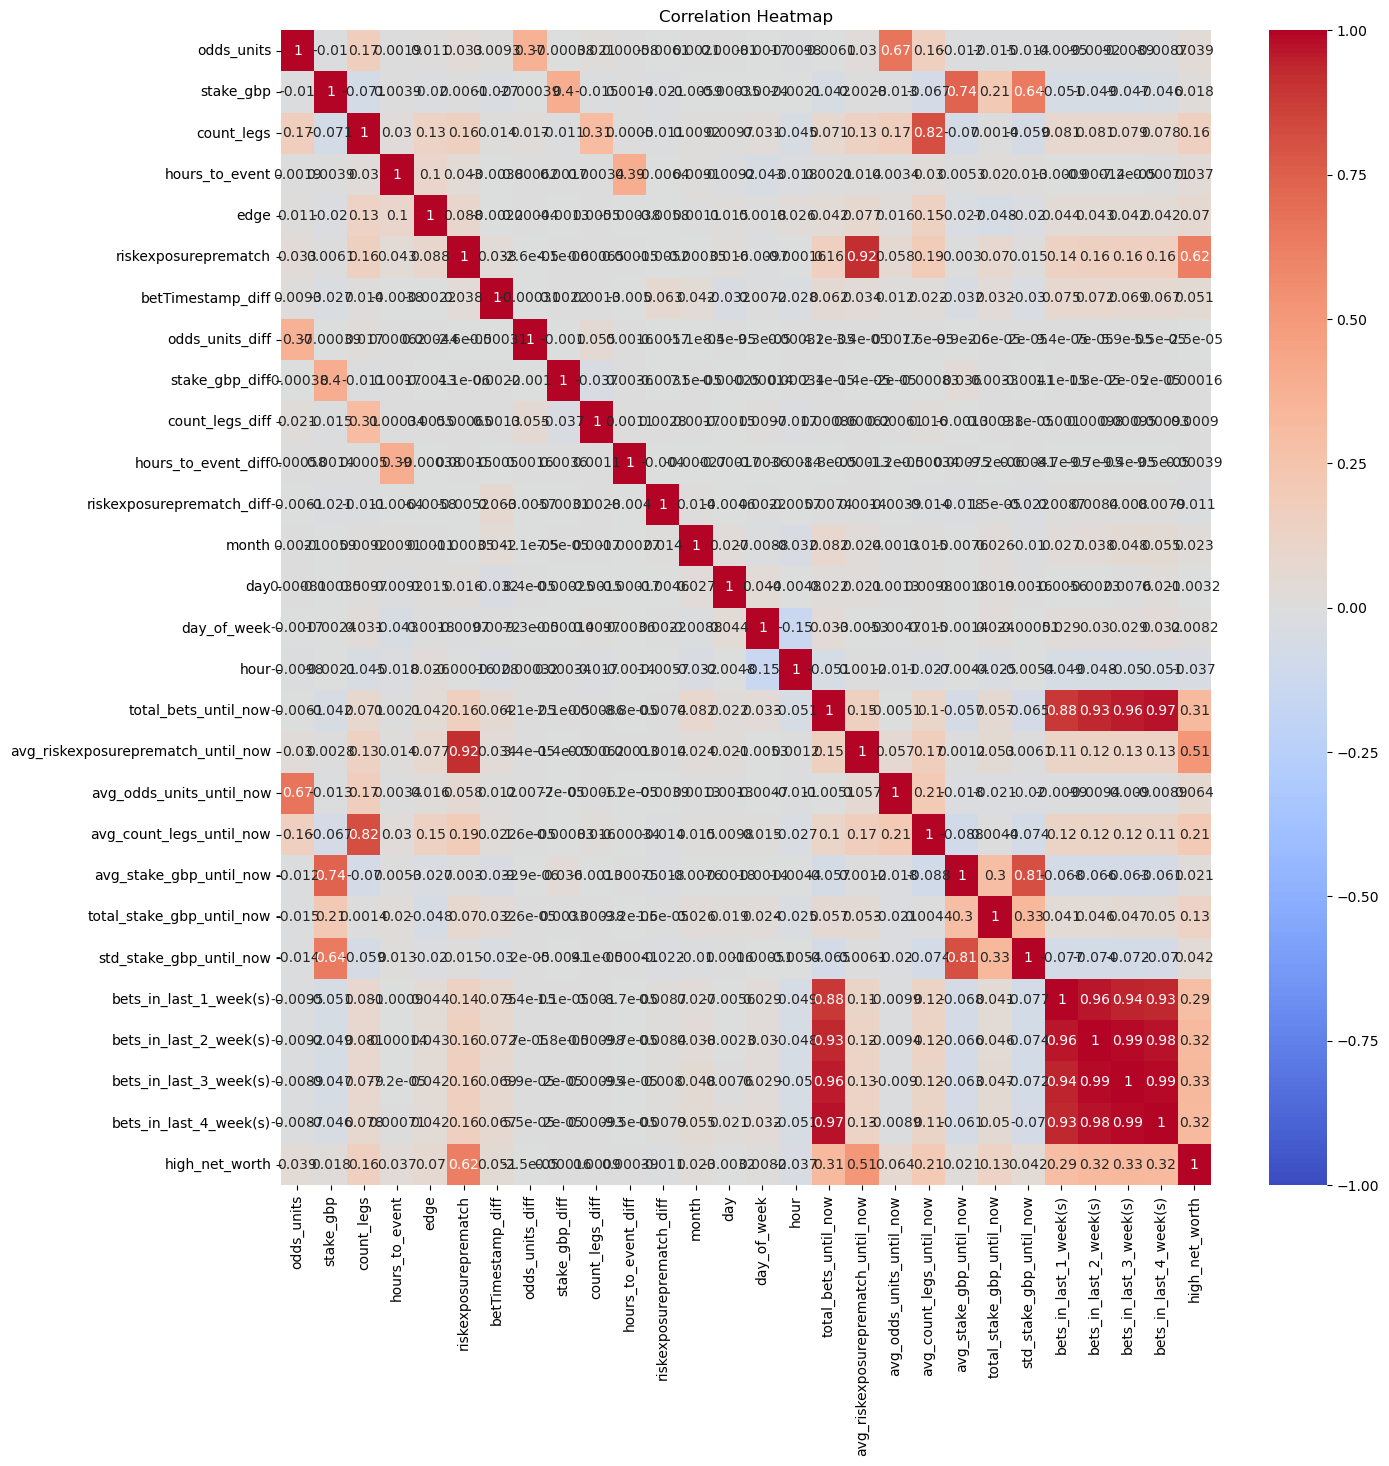

In [38]:
# Correlation Analysis
colns = ['odds_units', 'stake_gbp', 'count_legs', 'hours_to_event', 'edge',
       'encrypted_user_no', 'riskexposureprematch',
       'betTimestamp_diff', 'odds_units_diff', 'stake_gbp_diff',
       'count_legs_diff', 'hours_to_event_diff', 'riskexposureprematch_diff', 'total_bets_until_now',
       'avg_riskexposureprematch_until_now', 'avg_odds_units_until_now',
       'avg_count_legs_until_now', 'avg_stake_gbp_until_now',
       'total_stake_gbp_until_now', 'std_stake_gbp_until_now',
       'bets_in_last_1_week(s)', 'bets_in_last_2_week(s)',
       'bets_in_last_3_week(s)', 'bets_in_last_4_week(s)', 'high_net_worth']

correlation_matrix = labelled_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [36]:
#Focus on Target Variable
target_correlations = correlation_matrix['high_net_worth'].sort_values(ascending=False)
print(target_correlations)


high_net_worth                        1.000000
riskexposureprematch                  0.618882
avg_riskexposureprematch_until_now    0.509455
bets_in_last_3_week(s)                0.325164
bets_in_last_4_week(s)                0.317816
bets_in_last_2_week(s)                0.315470
total_bets_until_now                  0.313703
bets_in_last_1_week(s)                0.289422
avg_count_legs_until_now              0.205233
count_legs                            0.162376
total_stake_gbp_until_now             0.130440
edge                                  0.069833
avg_odds_units_until_now              0.063834
betTimestamp_diff                     0.050520
std_stake_gbp_until_now               0.041619
odds_units                            0.039388
hours_to_event                        0.037409
month                                 0.022702
avg_stake_gbp_until_now               0.021320
stake_gbp                             0.018438
day_of_week                           0.008168
count_legs_di

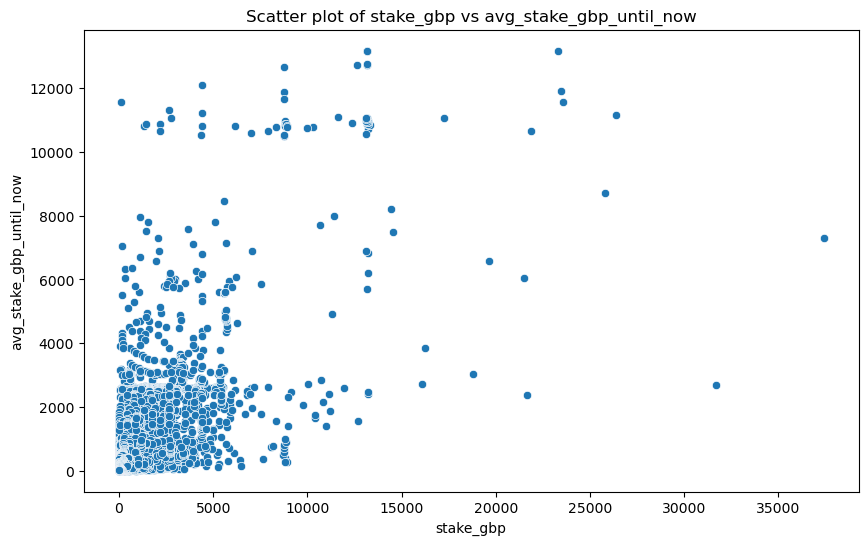

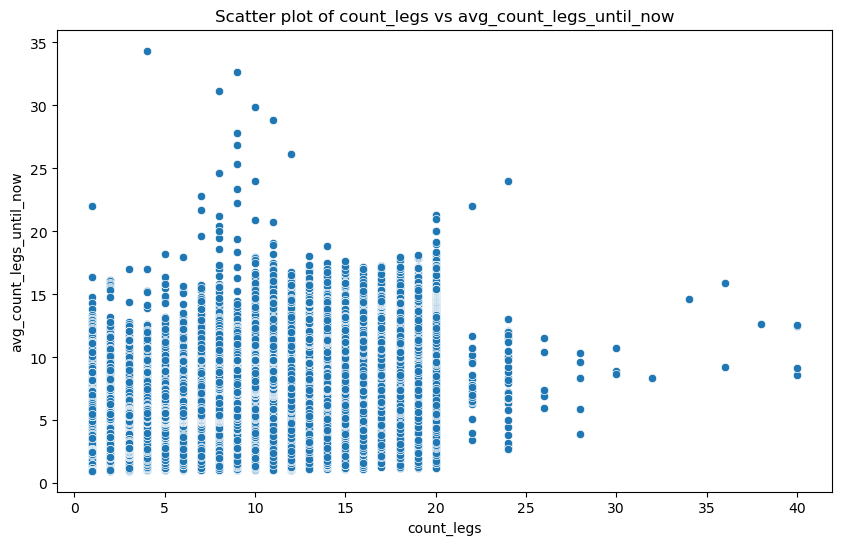

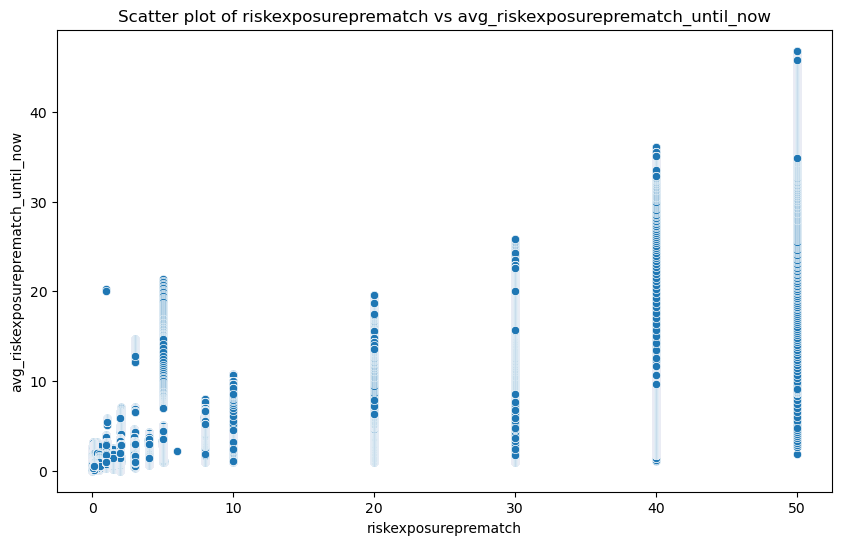

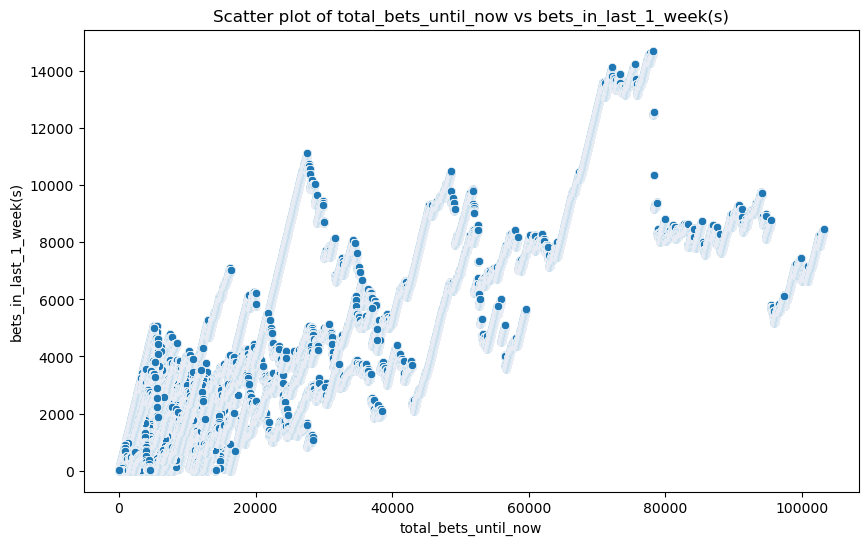

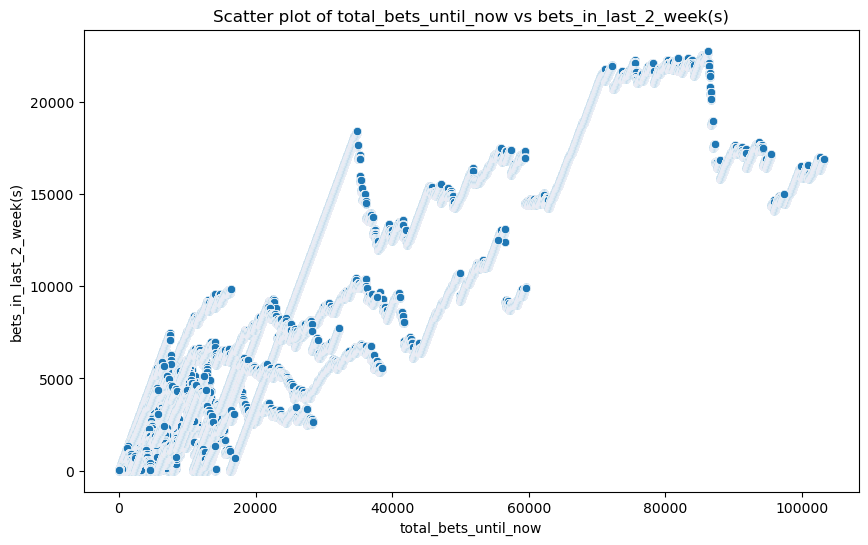

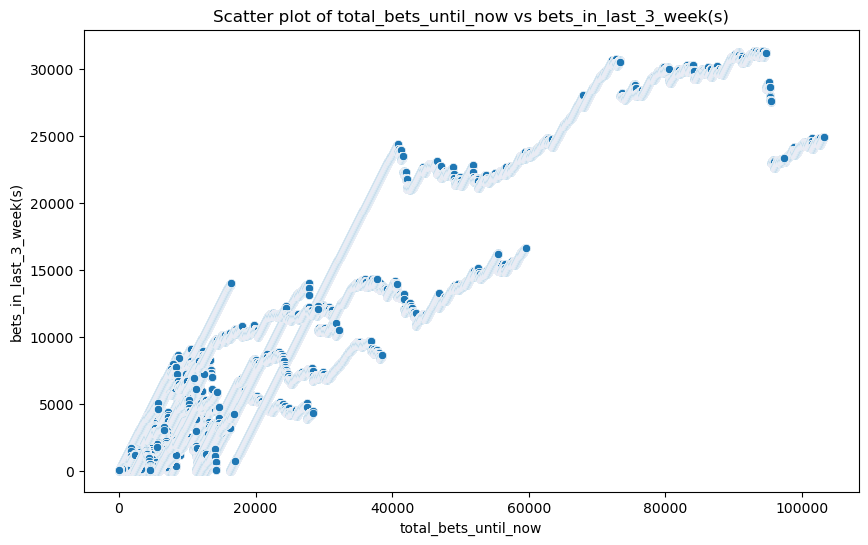

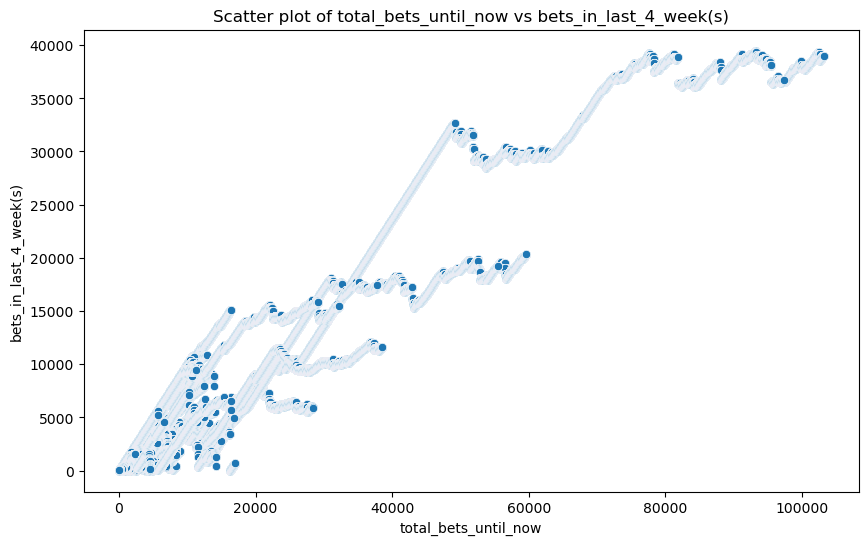

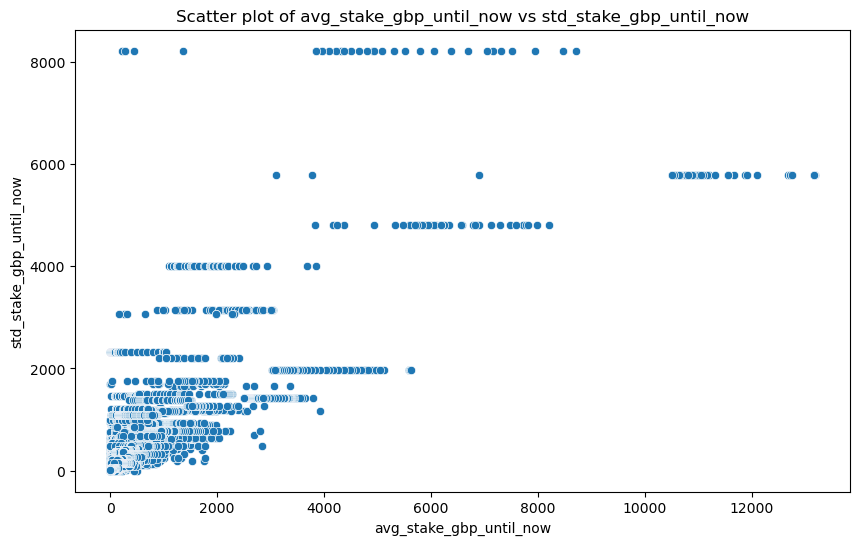

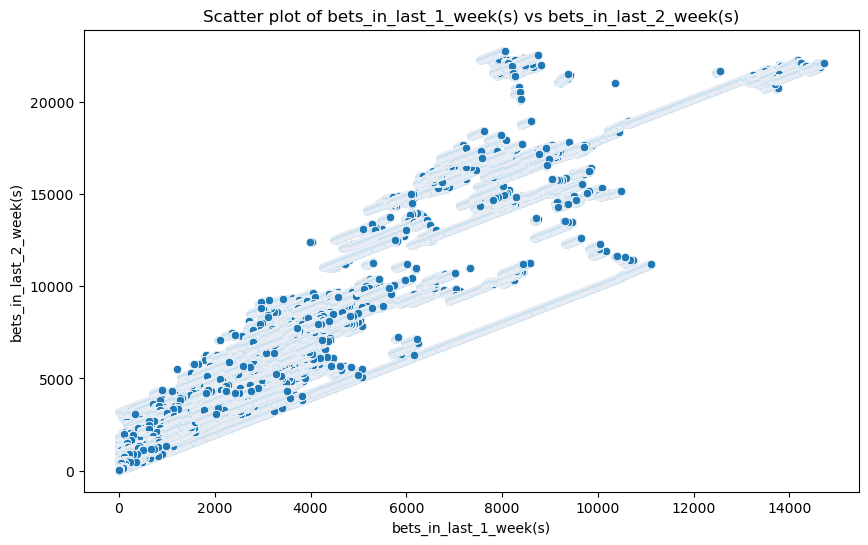

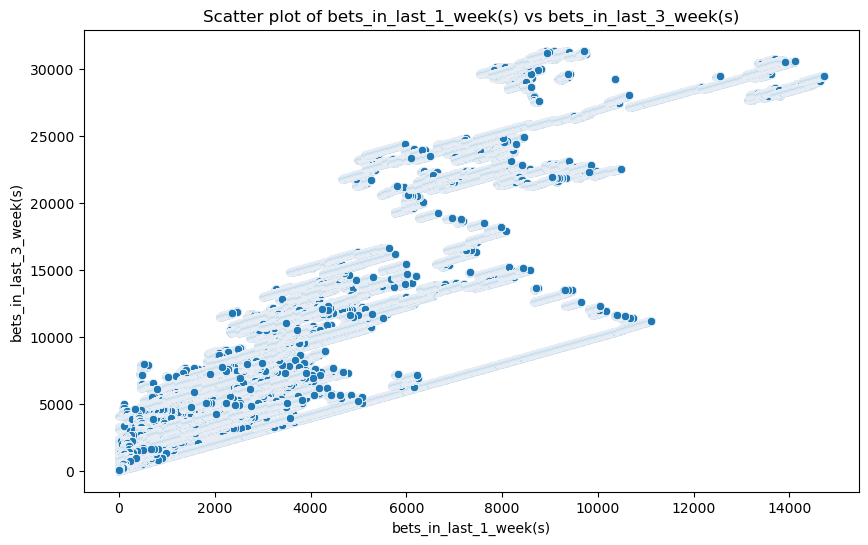

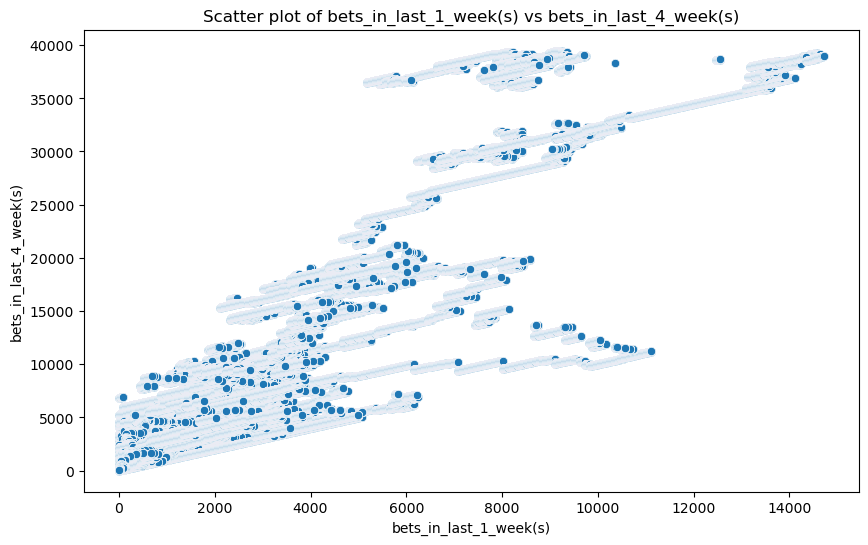

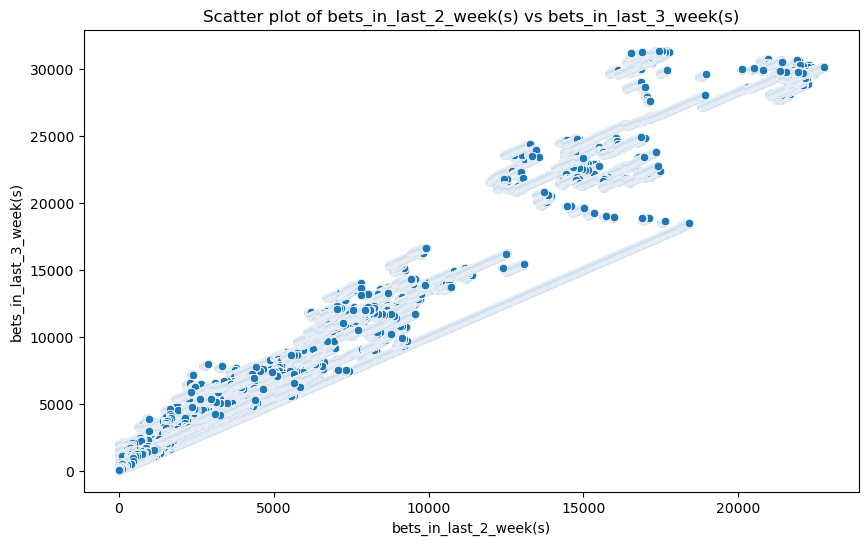

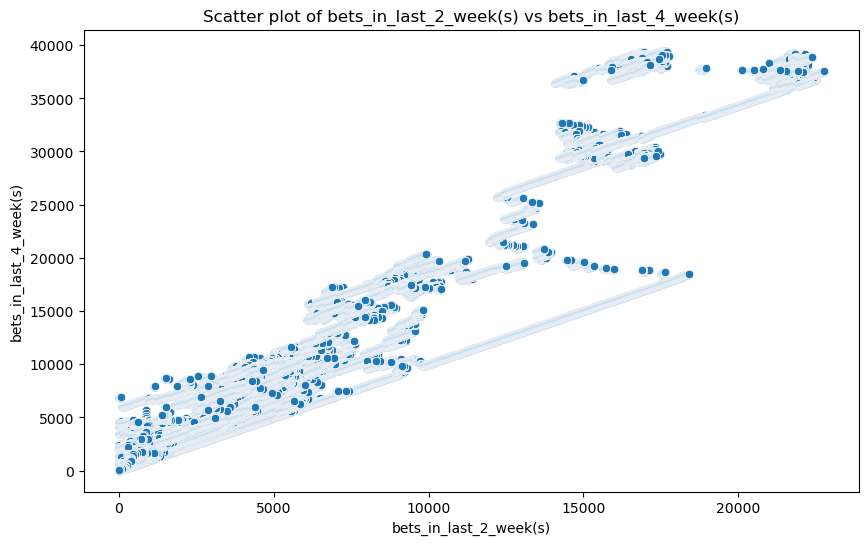

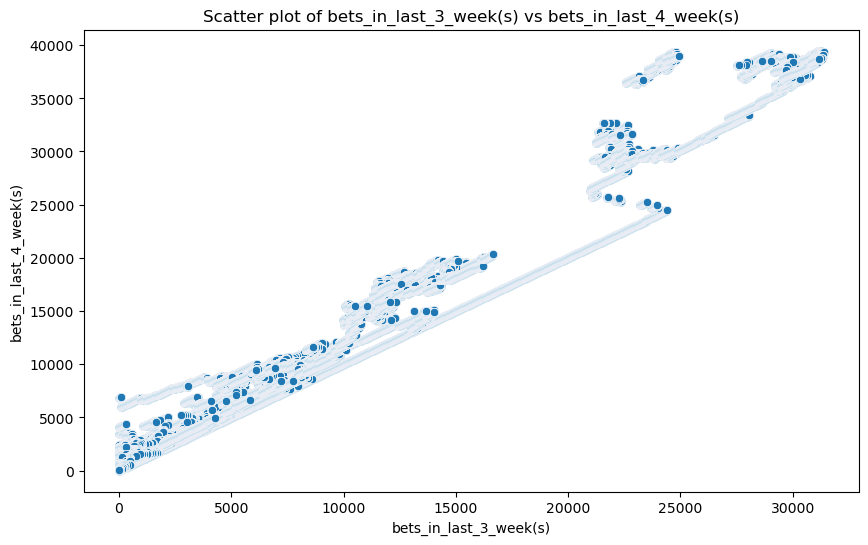

In [40]:
# Plot high correlation scatter plots

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Get columns to iterate using integer indices
cols = correlation_matrix.columns

# Filter entries where correlation is above a threshold (e.g., 0.7)
high_corr_pairs = [(cols[i], cols[j]) for i in range(len(cols)) for j in range(len(cols)) 
                   if abs(correlation_matrix.iloc[i, j]) > 0.7 and i != j and mask[i, j]]

# Plot scatter plots for high correlation pairs
for pair in high_corr_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=labelled_df[pair[0]], y=labelled_df[pair[1]])
    plt.title(f'Scatter plot of {pair[0]} vs {pair[1]}')
    plt.show()
